In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import argparse  as ap
import seaborn as sns


# font = fm.FontProperties(size=9)
manager = fm.FontManager()
fm.fontManager.ttflist = manager.ttflist
plt.rc('font', family='NanumBarunGothic') 

In [2]:
# plt.figure()
# plt.title("하이하이")
# plt.show()

In [3]:
# perser = ap.ArgumentParser()
# perser.add_argument('-d','--data_path',type=str, default='./data')
# # perser.add_argument('-t','--train_model',type=str,default='./src/train.py')

# args =  perser.parse_args()

data_path = 'data/second'




# 데이터 불러오기
inputs = pd.read_csv(f'{data_path}/train_input.csv')
outputs = pd.read_csv(f'{data_path}/train_output.csv')
test_inputs = pd.read_csv(f'{data_path}/test_input.csv')
inputs

,Sample_no,시설ID,일,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,외부온도,외부풍향,외부풍속,지습,급액횟수,급액EC(dS/m),급액pH,급액량(회당),품종,재배형태
0,0,farm25,20220323,30주차,517.041667,84.985417,20.610833,0.0,NaN,1879,11.166667,195.0,0.083333,0.0,14,2.68,4.42,88,tomato09,NaN
1,0,farm25,20220324,30주차,514.416667,88.291250,20.695000,0.0,NaN,1411,12.708333,142.5,0.000000,0.0,14,2.78,5.63,97,tomato09,NaN
2,0,farm25,20220326,30주차,471.875000,83.514583,20.402500,0.0,NaN,1955,8.791667,202.5,0.000000,0.0,14,2.69,4.25,101,tomato09,NaN
3,0,farm25,20220327,30주차,469.250000,80.916250,20.139167,0.0,NaN,2231,8.041667,180.0,0.000000,0.0,14,2.70,4.25,99,tomato09,NaN
4,0,farm25,20220328,30주차,465.750000,82.026250,17.653333,0.0,NaN,2284,9.000000,97.5,0.041667,0.0,13,2.66,4.21,94,tomato09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,2027,farm04,20160821,7주차,334.684002,65.565417,21.985833,NaN,NaN,979,NaN,NaN,NaN,NaN,26,2.06,5.80,81,tomato07,NaN
10108,2027,farm04,20160822,7주차,333.726601,61.144167,22.530833,NaN,NaN,2515,NaN,NaN,NaN,NaN,28,2.43,4.42,32,tomato07,NaN
10109,2027,farm04,20160823,7주차,344.862883,72.867917,20.397917,NaN,NaN,1972,NaN,NaN,NaN,NaN,21,2.71,5.88,27,tomato07,NaN
10110,2027,farm04,20160826,7주차,372.708516,66.672917,24.401667,NaN,NaN,1314,NaN,NaN,NaN,NaN,18,2.50,5.39,82,tomato07,NaN


In [4]:
def check_null(df:pd.DataFrame):
    plt.figure(figsize=(20,10))
    sns.heatmap(df.isnull(),cbar=False,)
    plt.xticks(rotation=45)
    plt.show()

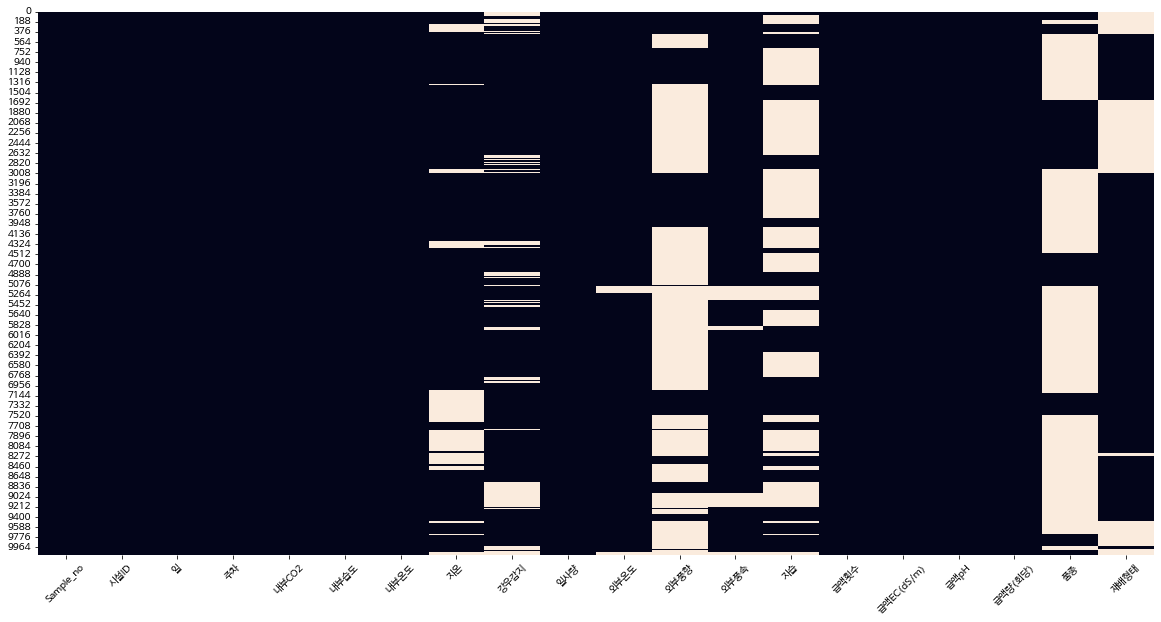

In [18]:
check_null(inputs)

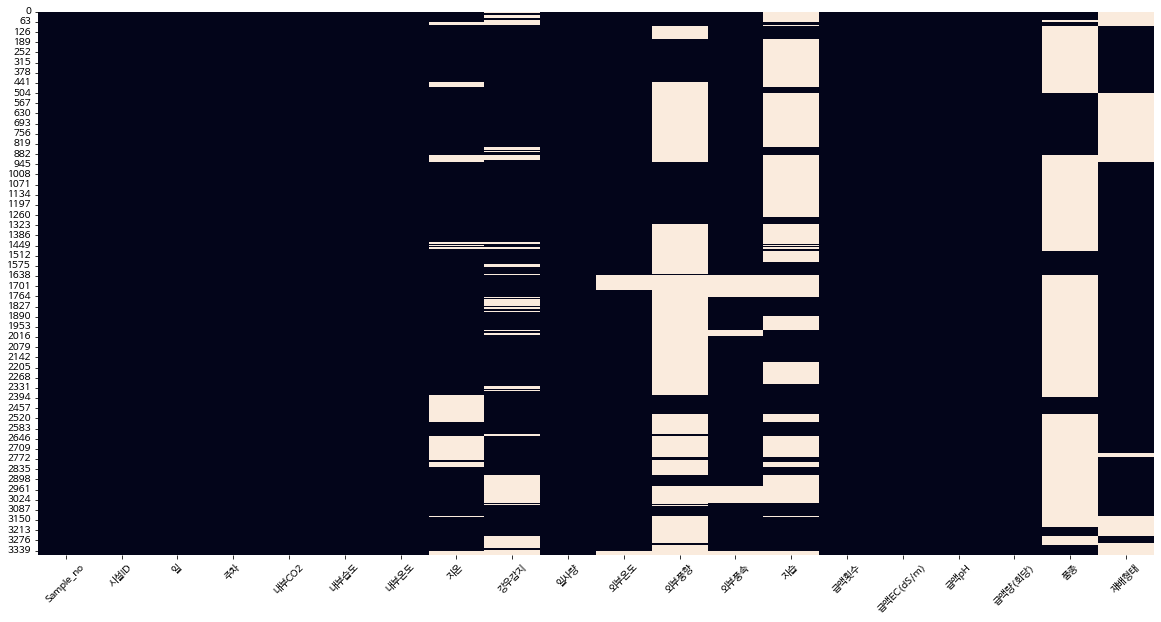

In [19]:
check_null(test_inputs)

In [16]:
per_farm = {}
farms = set(inputs['시설ID'])
farms

{'farm01',
 'farm02',
 'farm03',
 'farm04',
 'farm05',
 'farm06',
 'farm07',
 'farm08',
 'farm09',
 'farm10',
 'farm11',
 'farm12',
 'farm13',
 'farm14',
 'farm15',
 'farm16',
 'farm17',
 'farm18',
 'farm19',
 'farm20',
 'farm21',
 'farm22',
 'farm23',
 'farm24',
 'farm25',
 'farm26',
 'farm27',
 'farm28',
 'farm29',
 'farm30',
 'farm31',
 'farm32',
 'farm33',
 'farm34',
 'farm35',
 'farm36'}

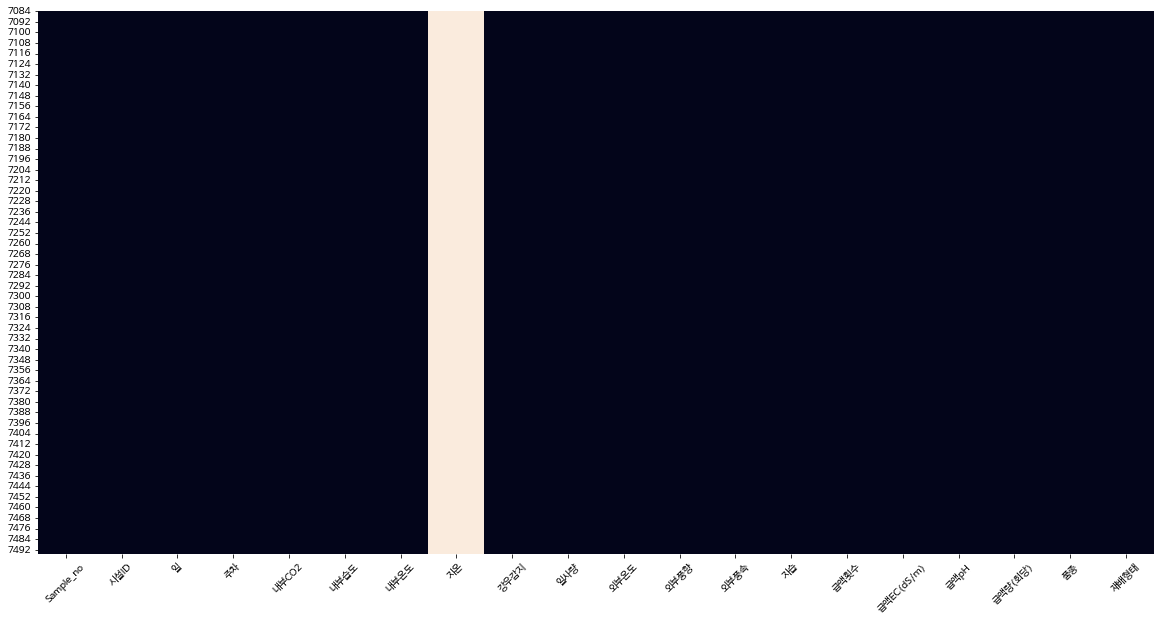

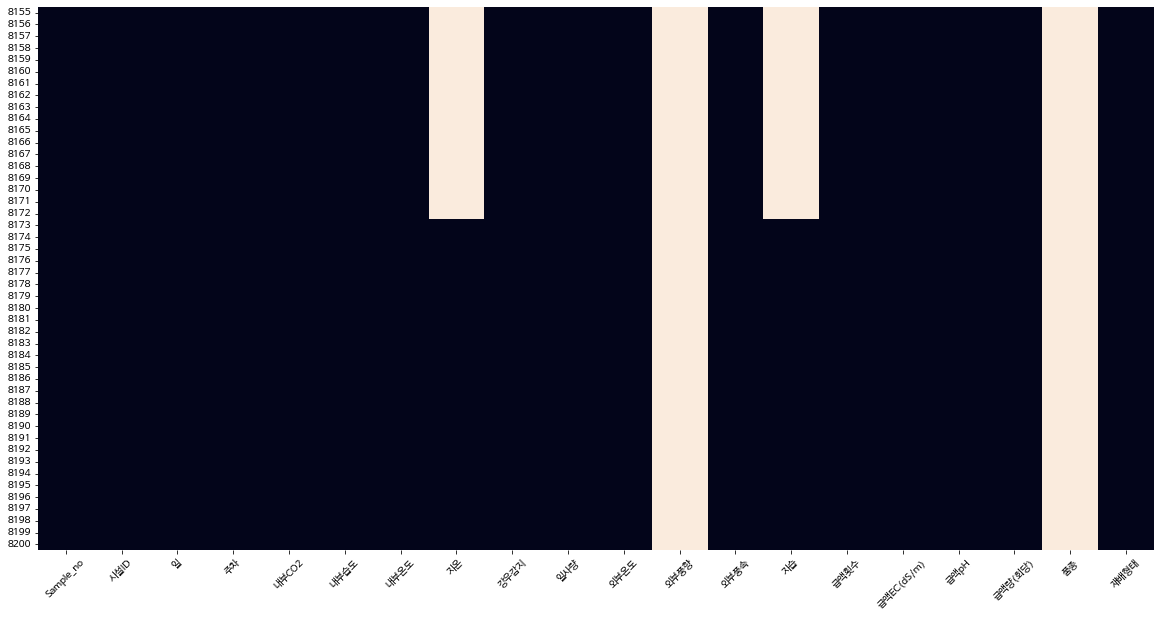

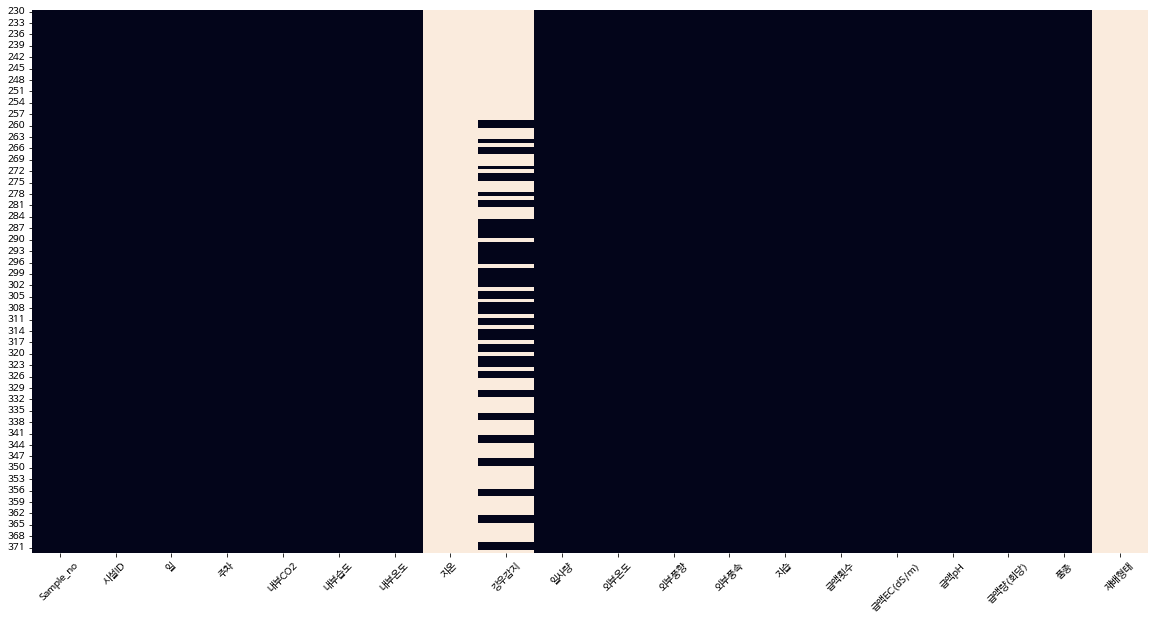

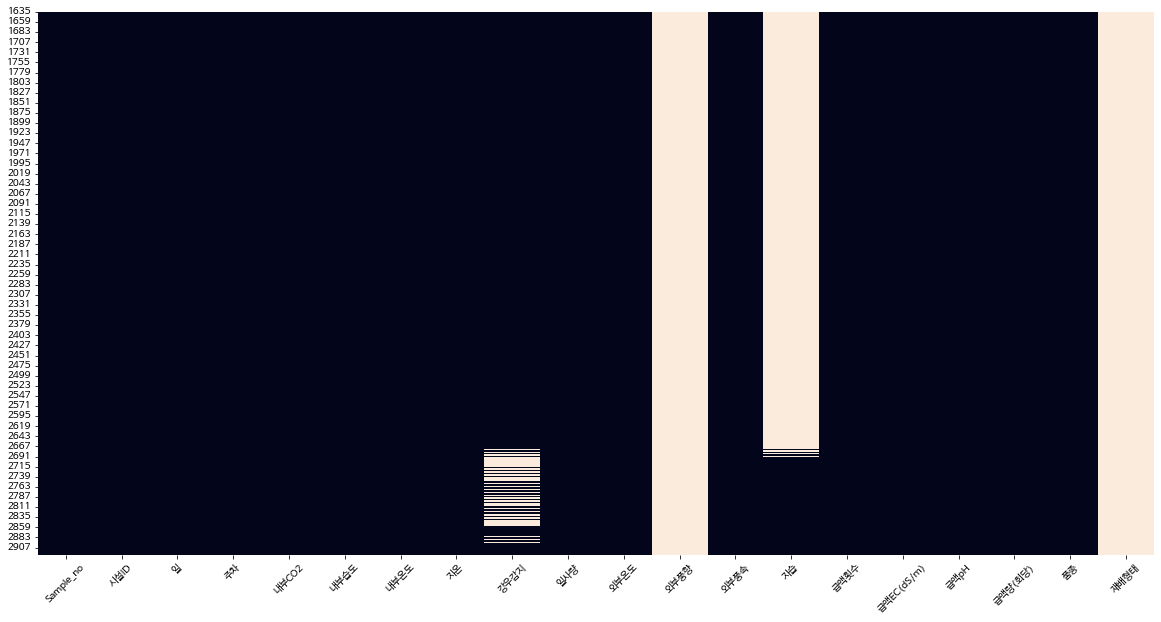

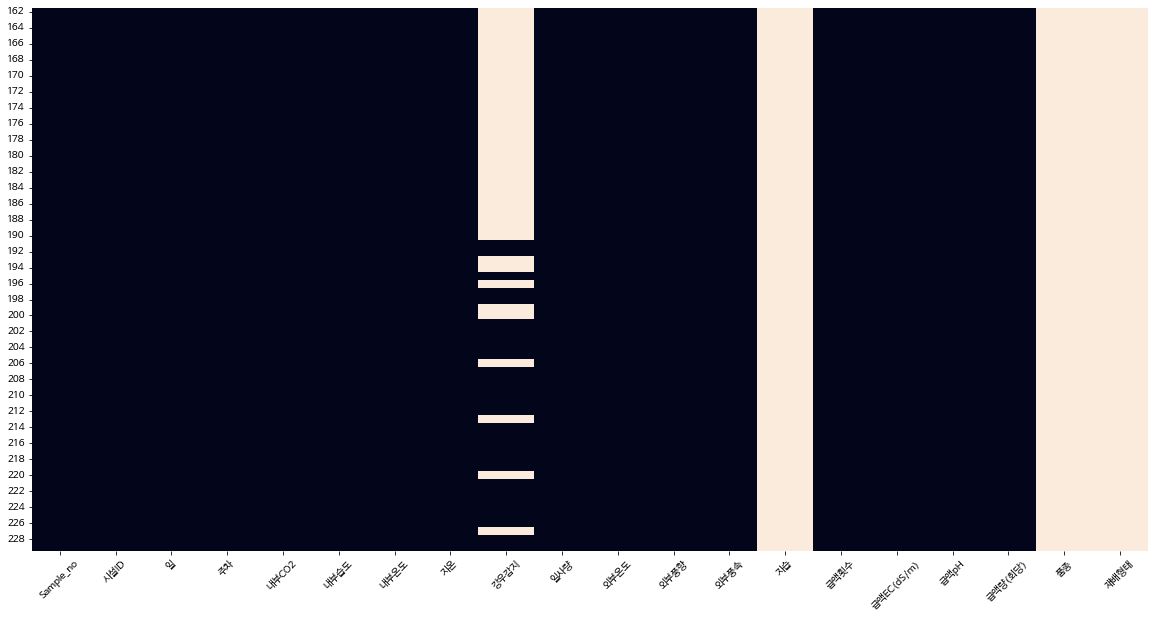

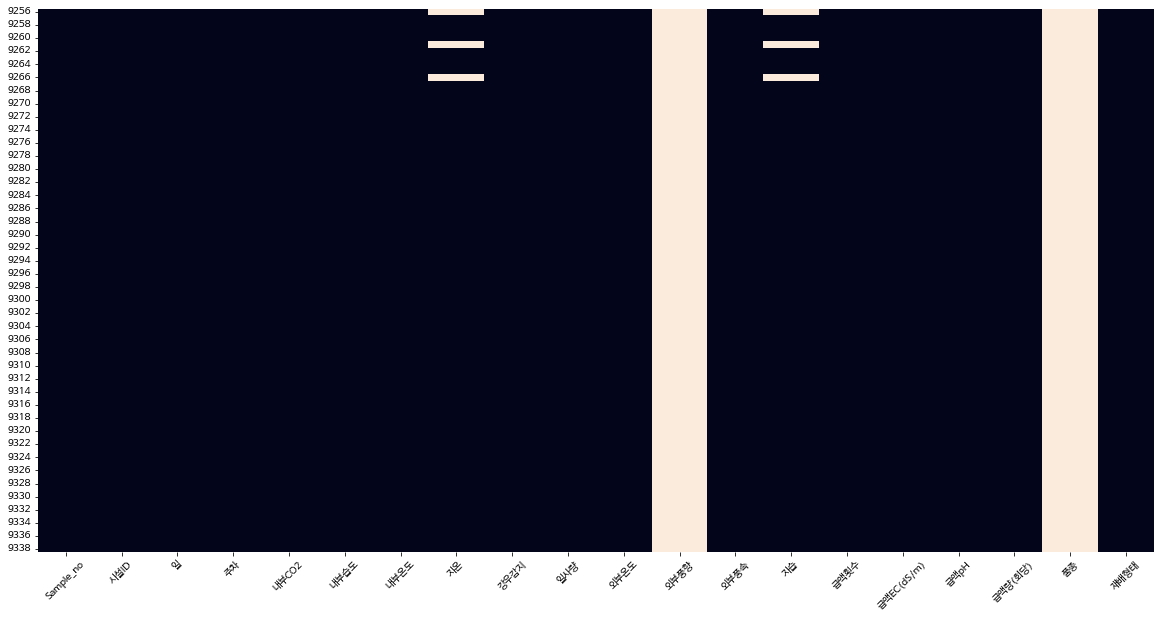

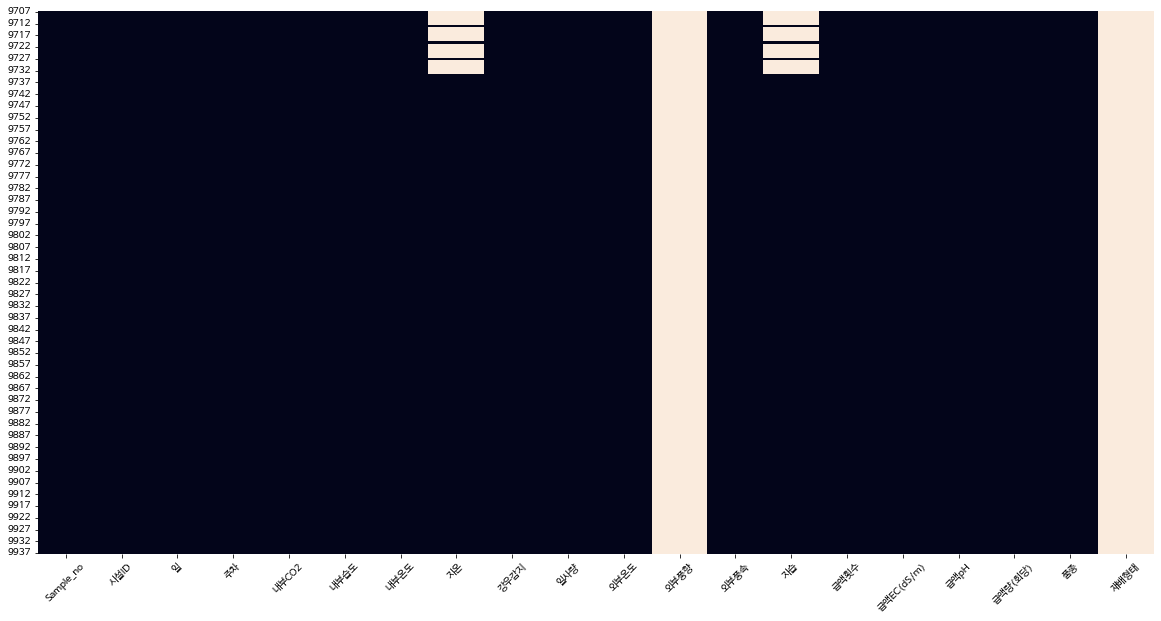

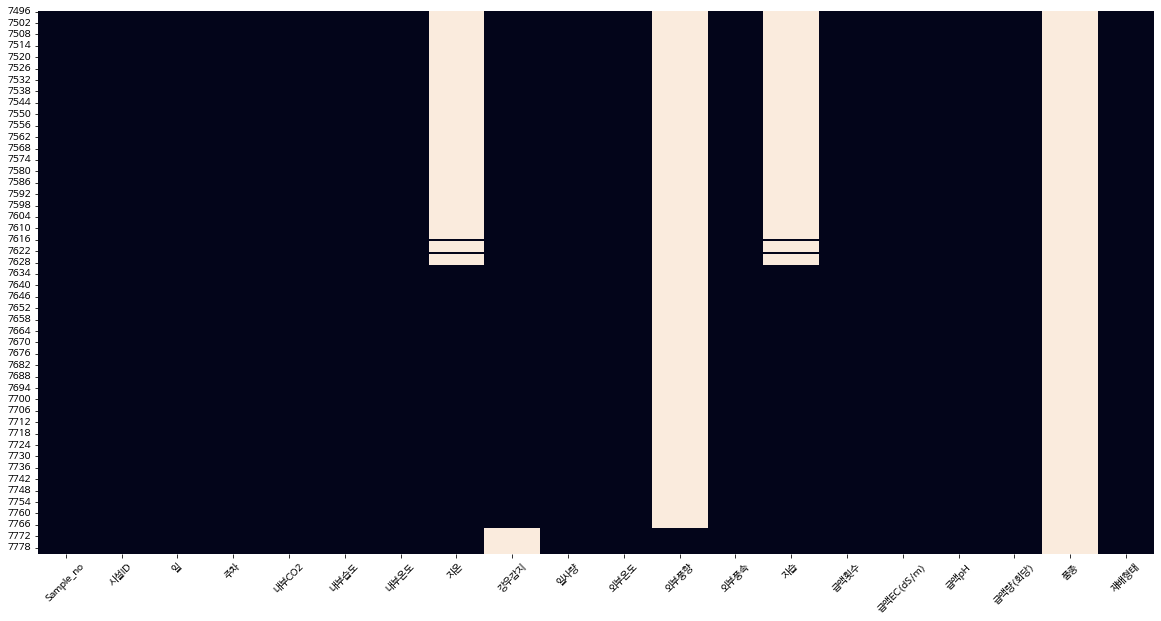

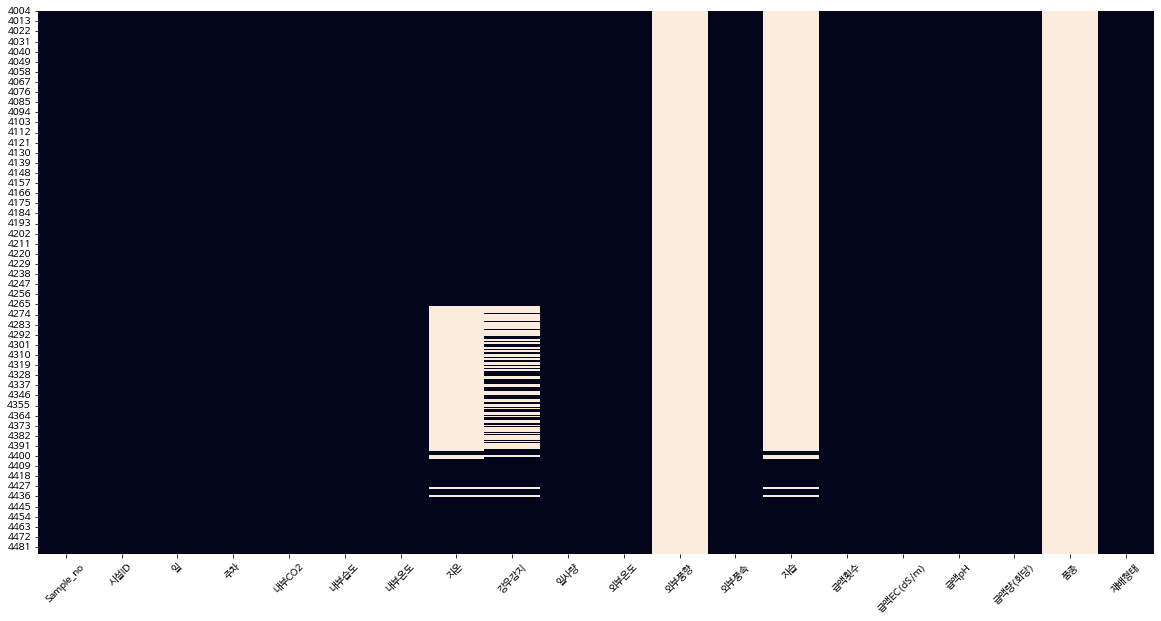

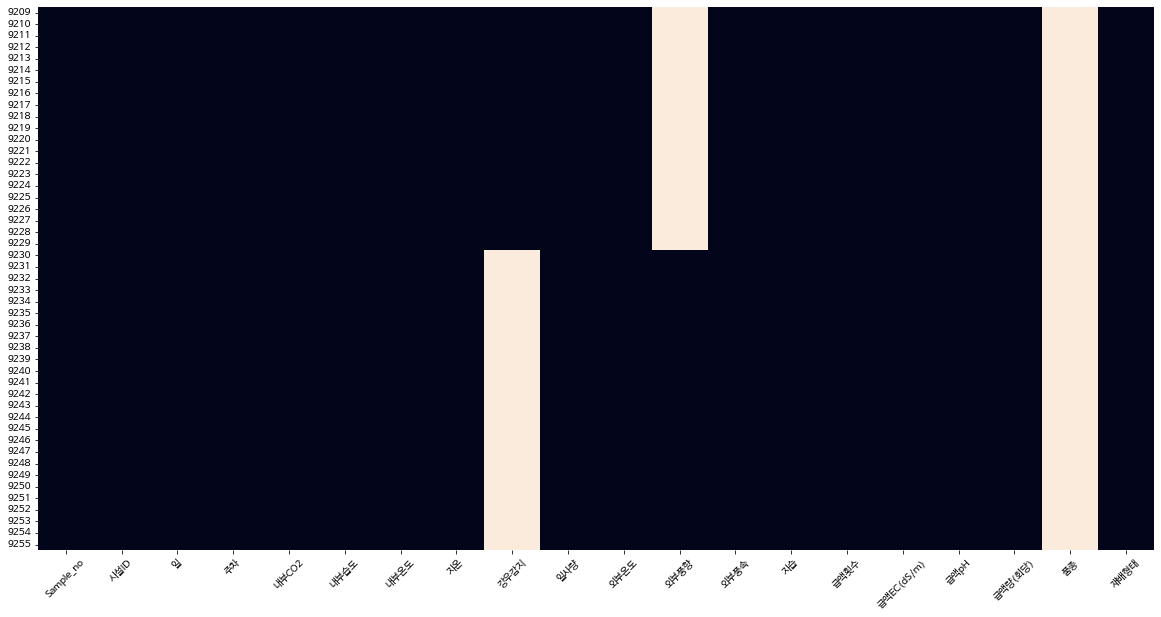

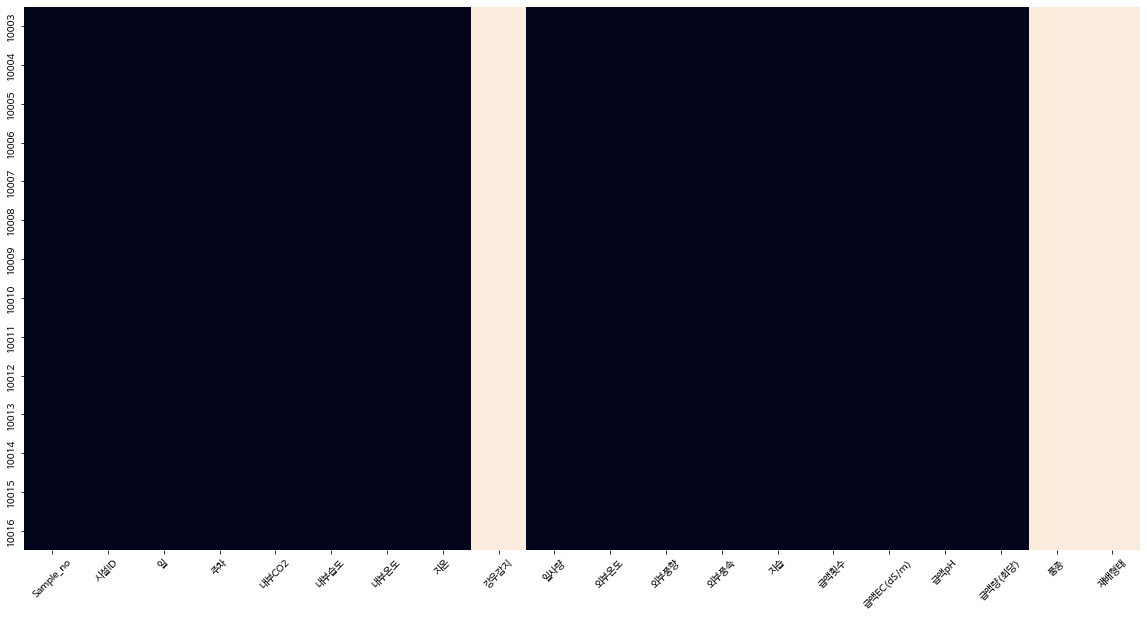

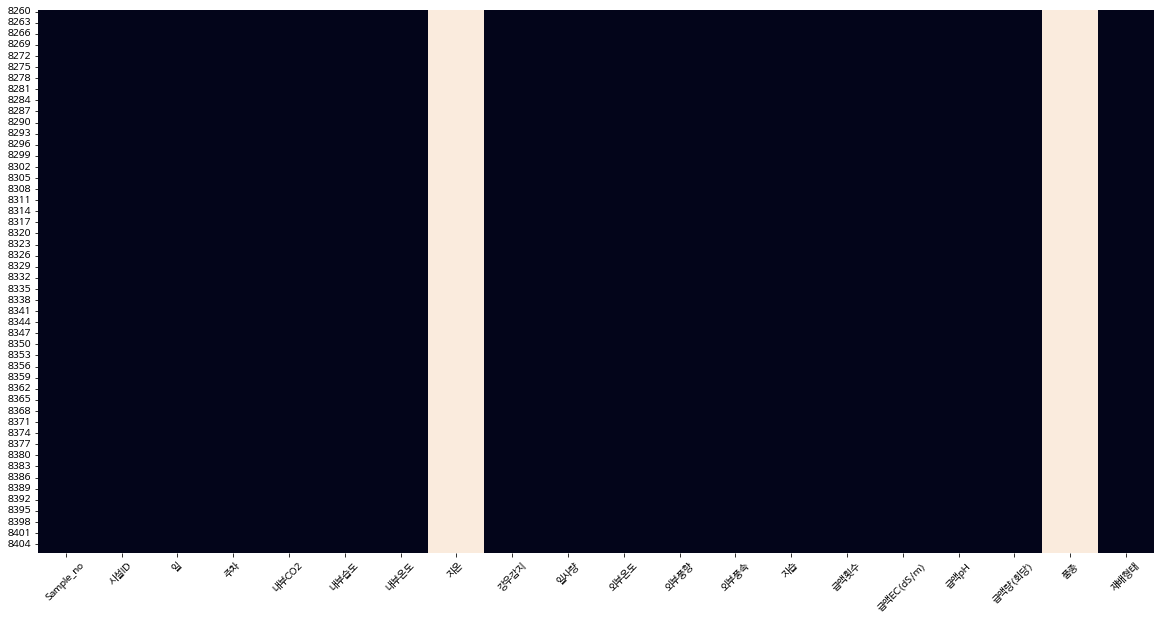

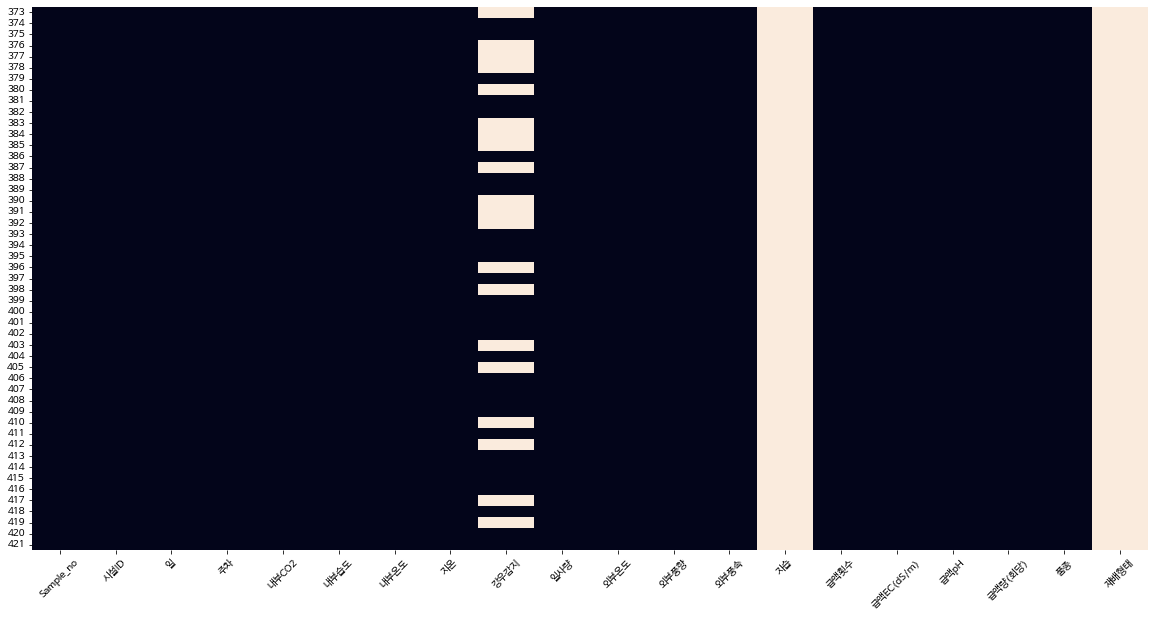

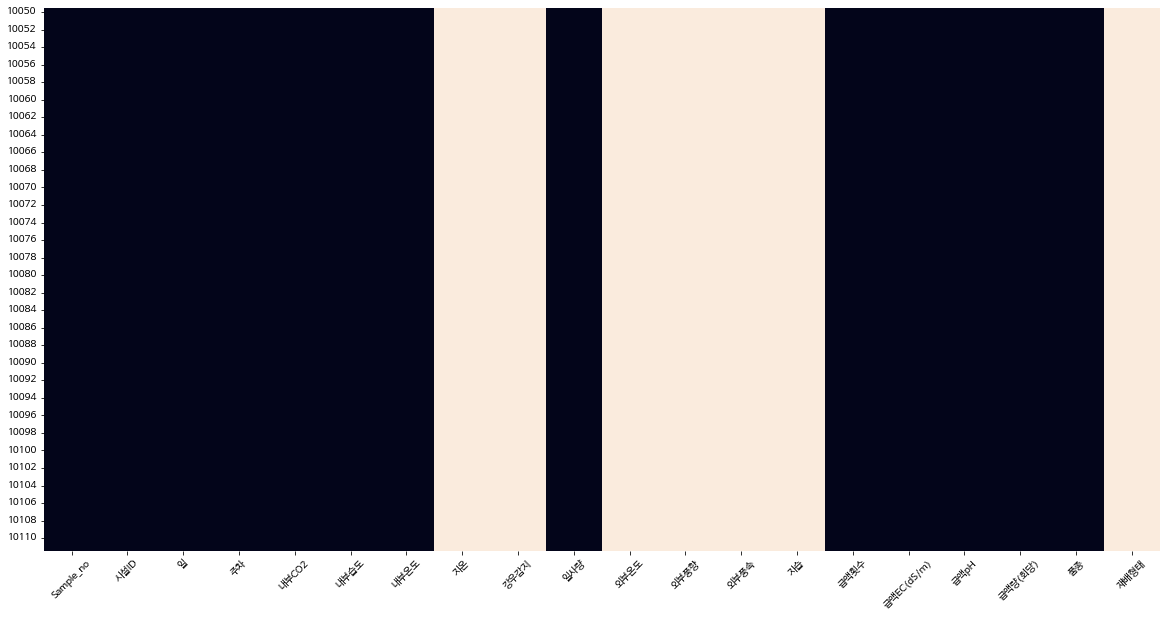

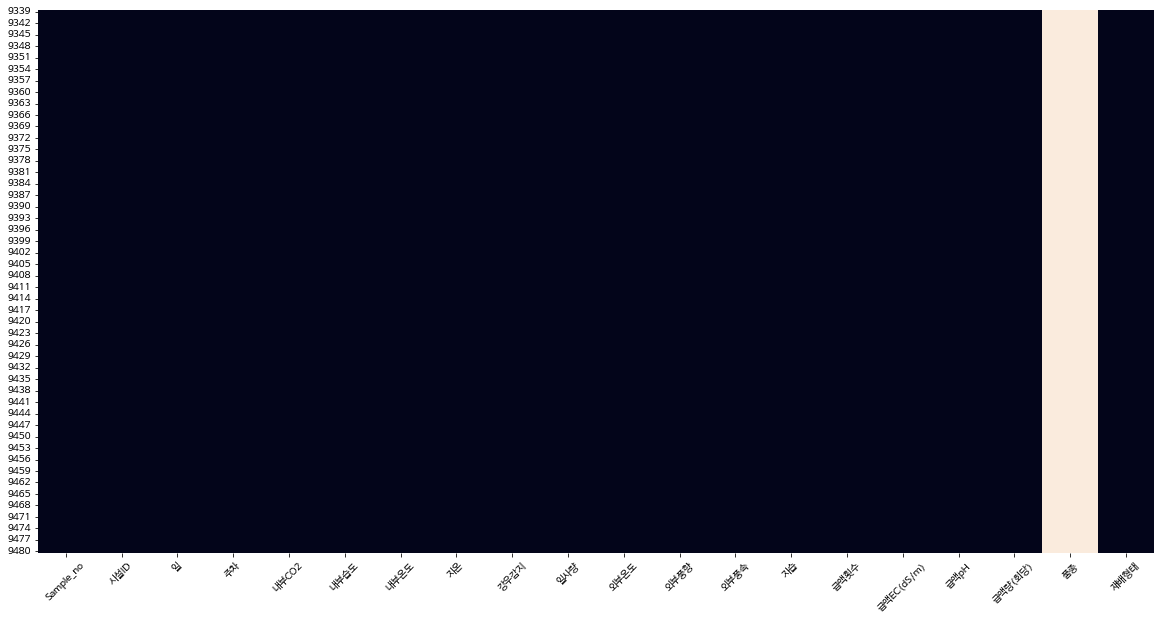

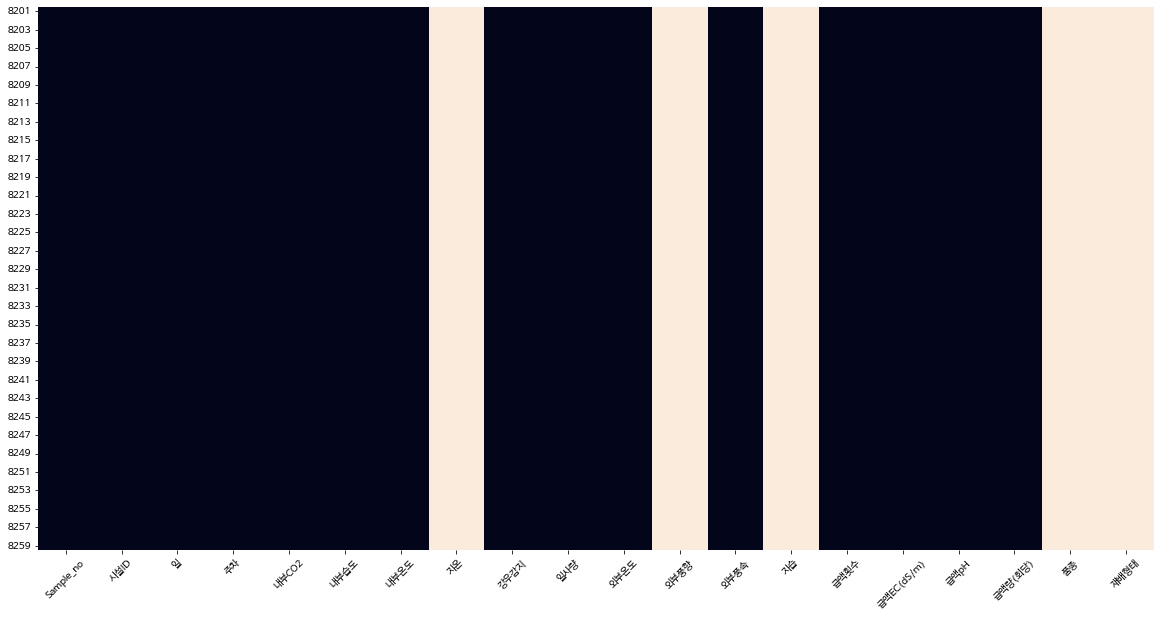

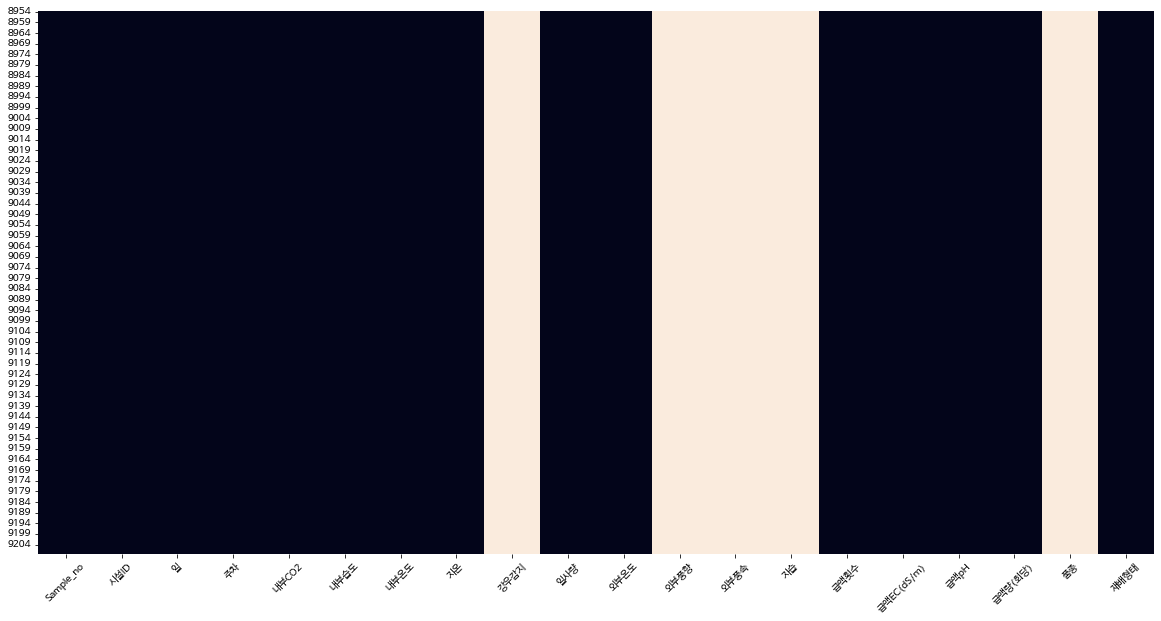

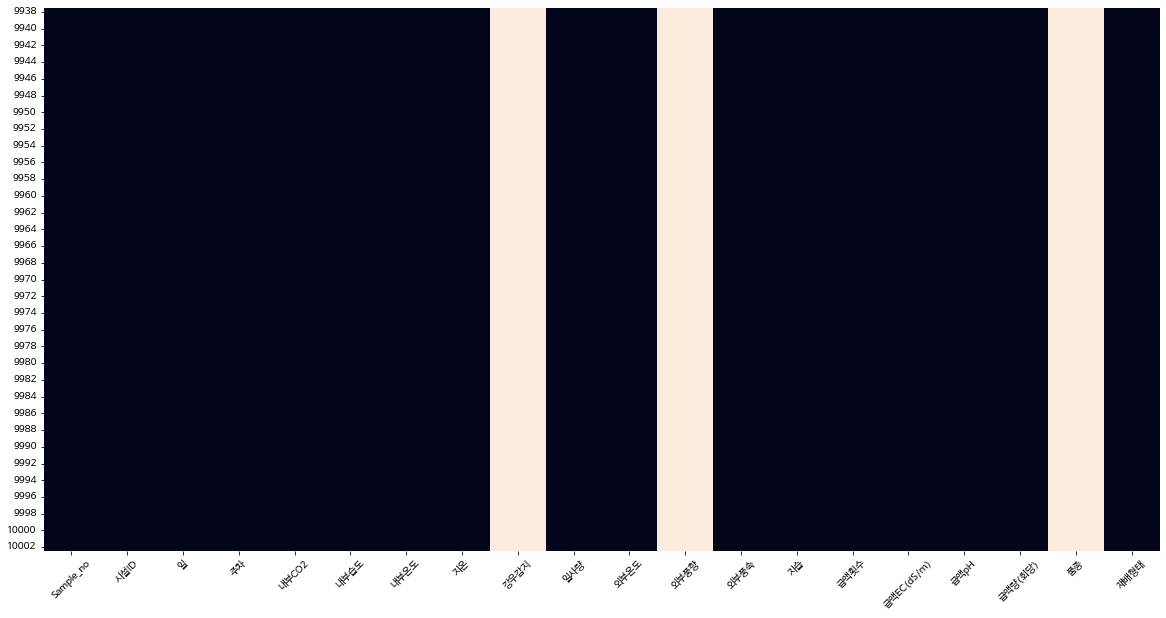

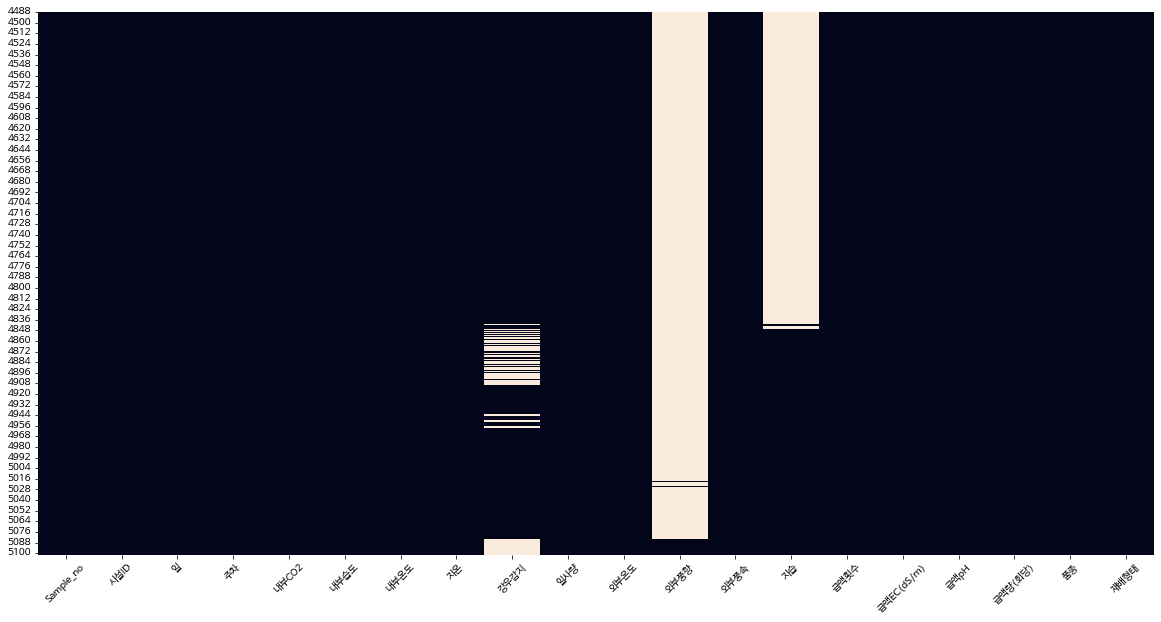

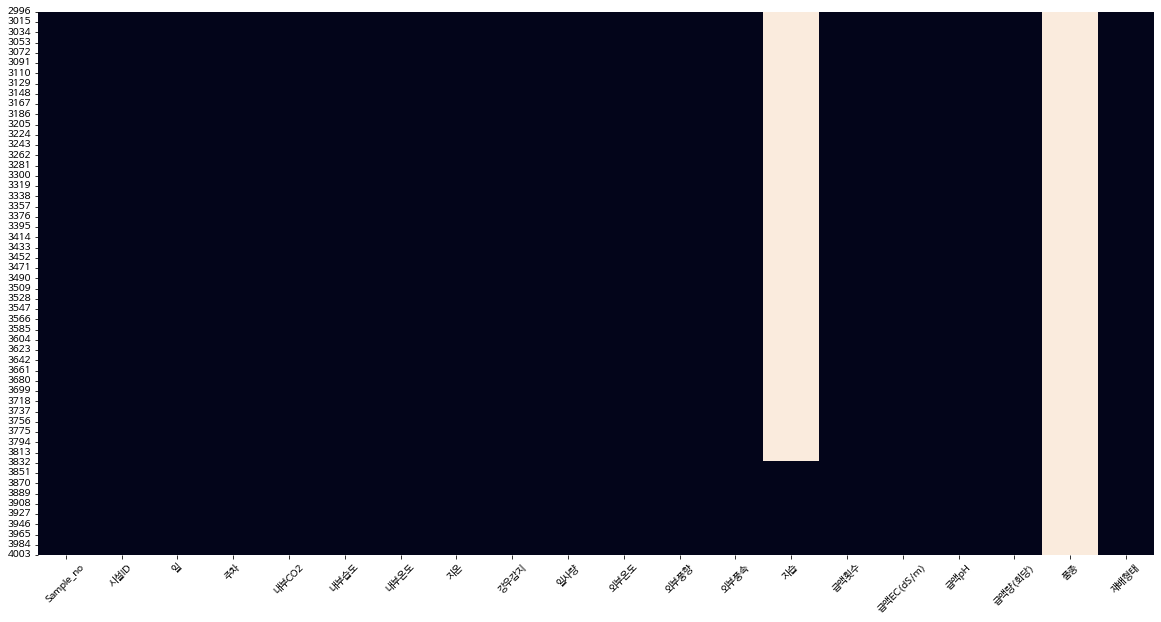

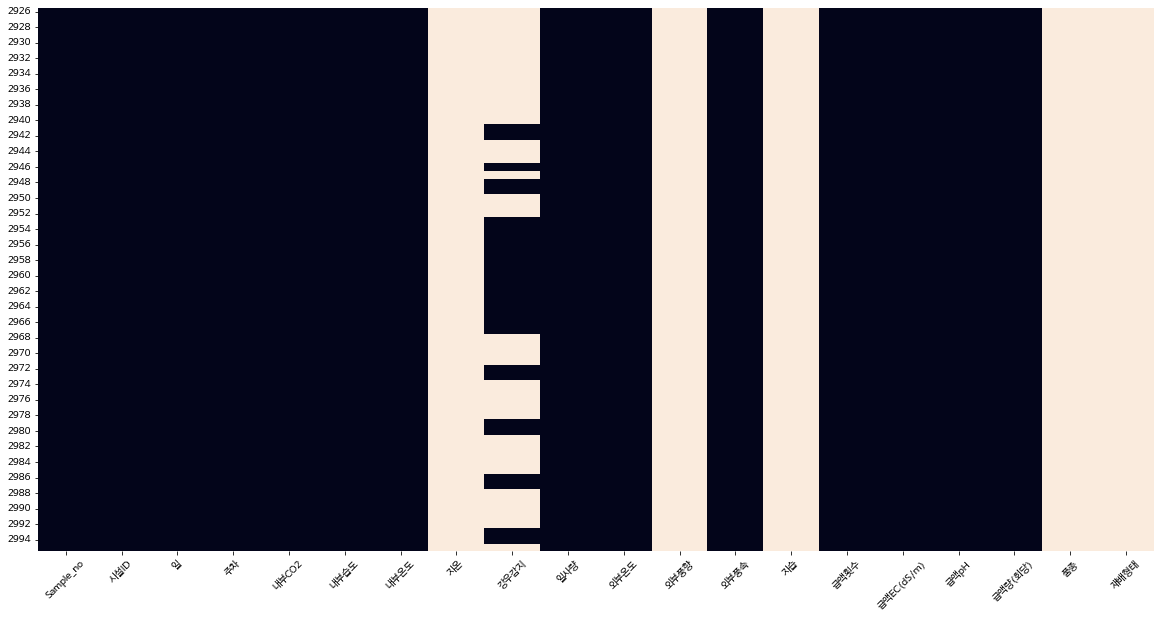

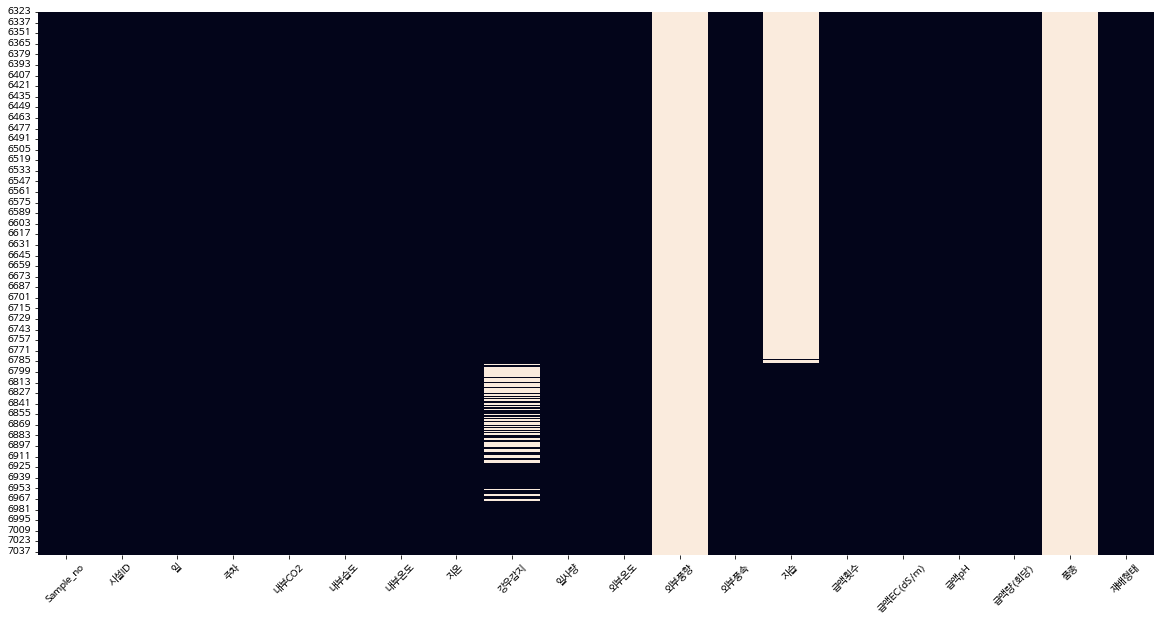

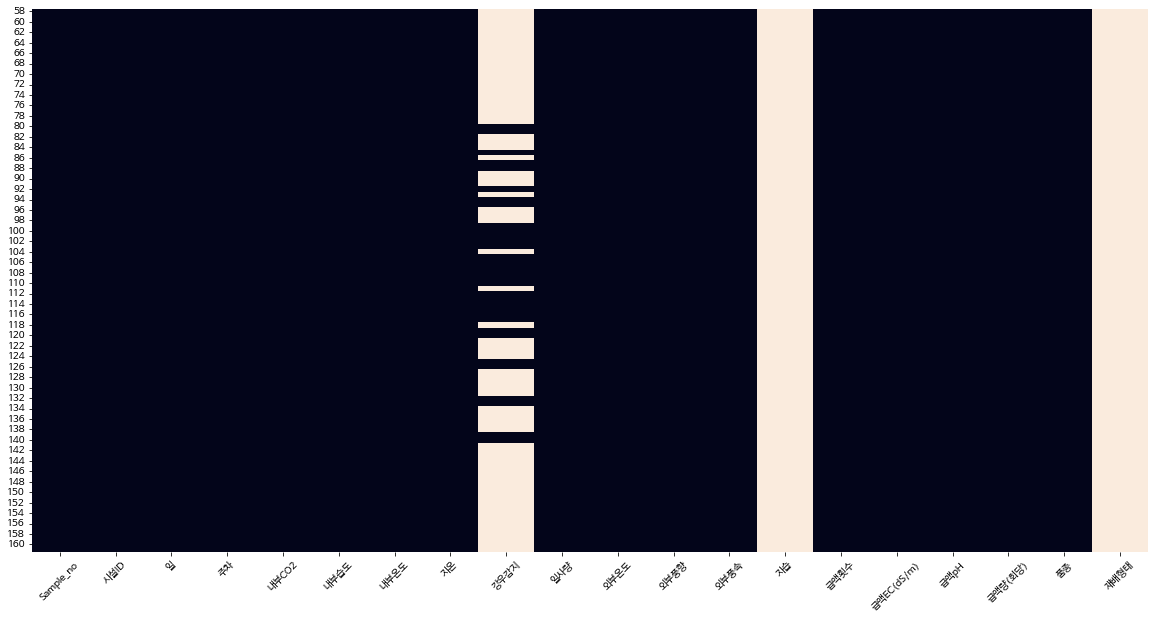

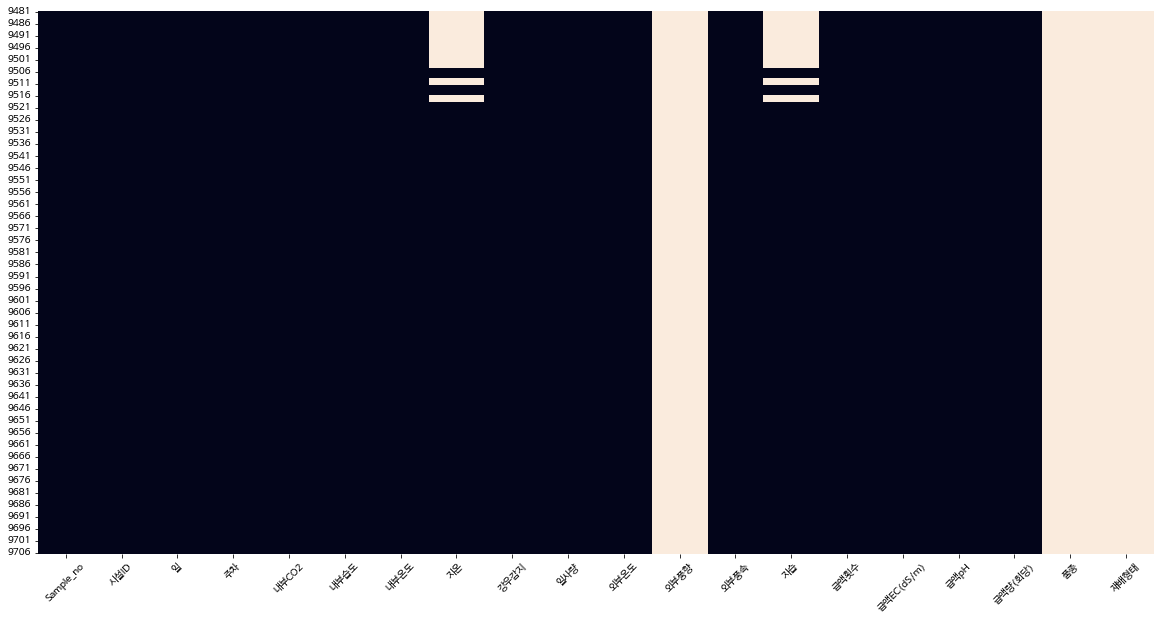

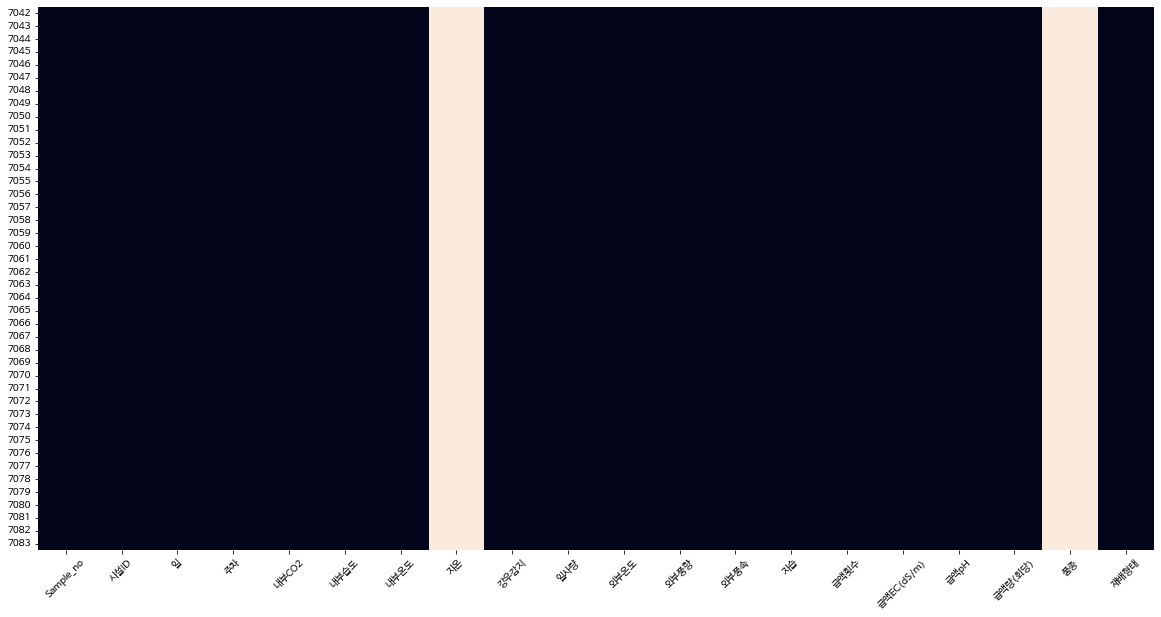

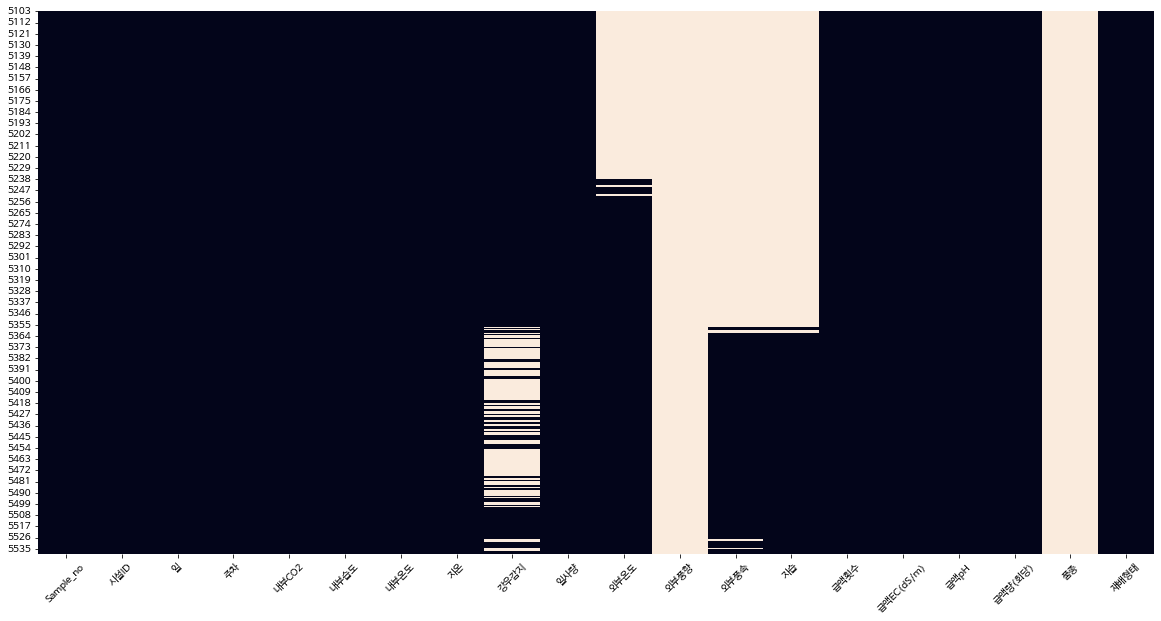

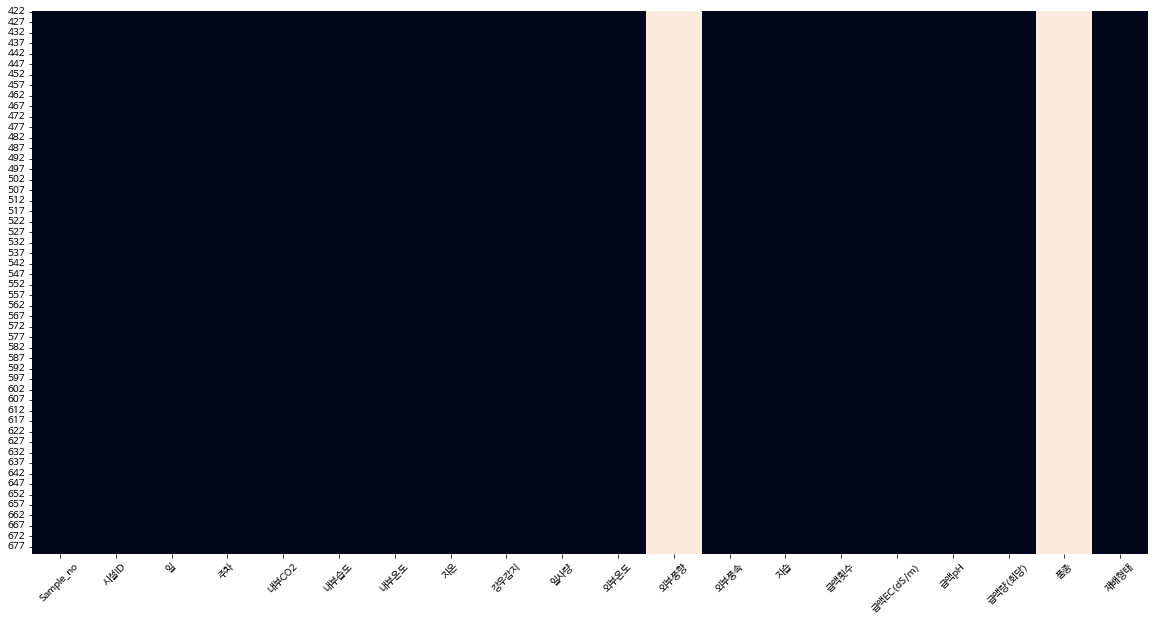

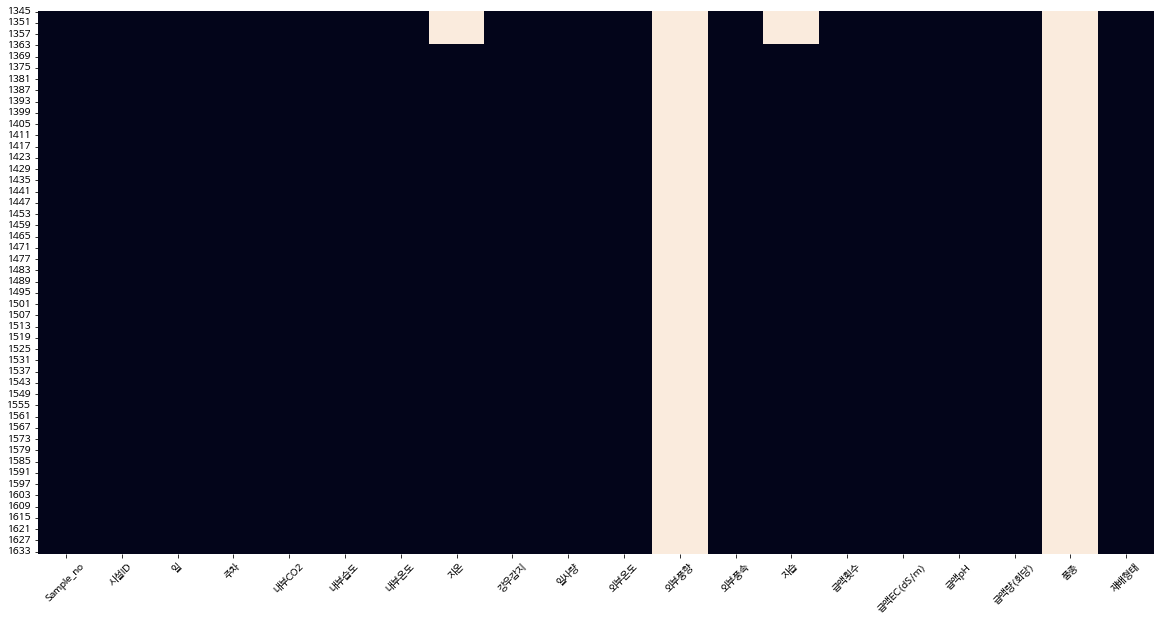

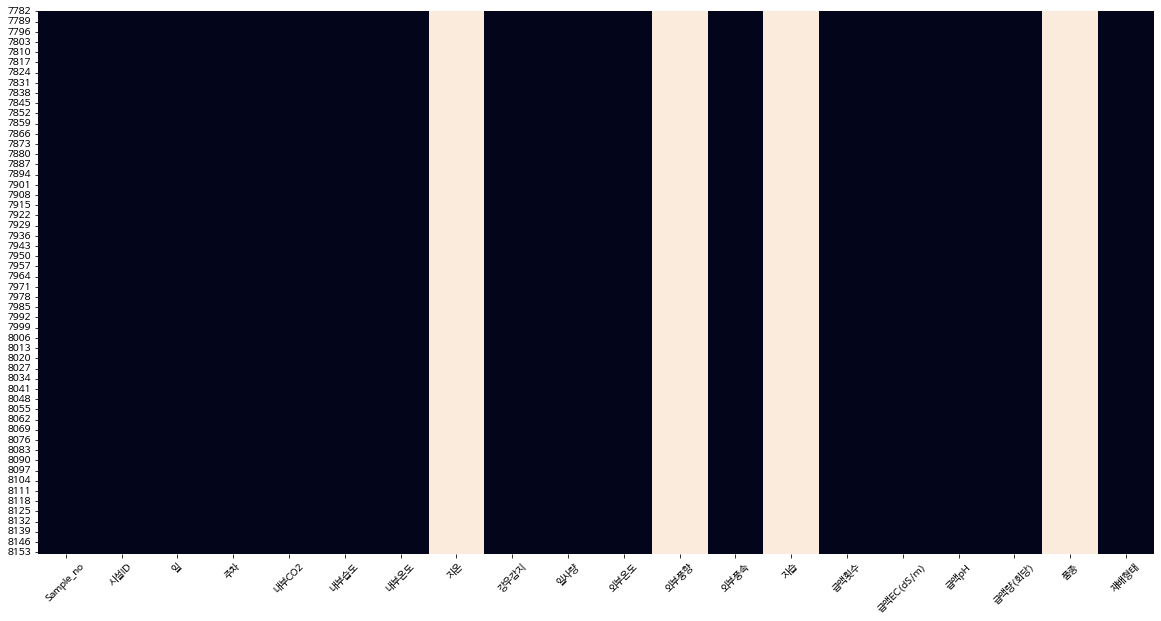

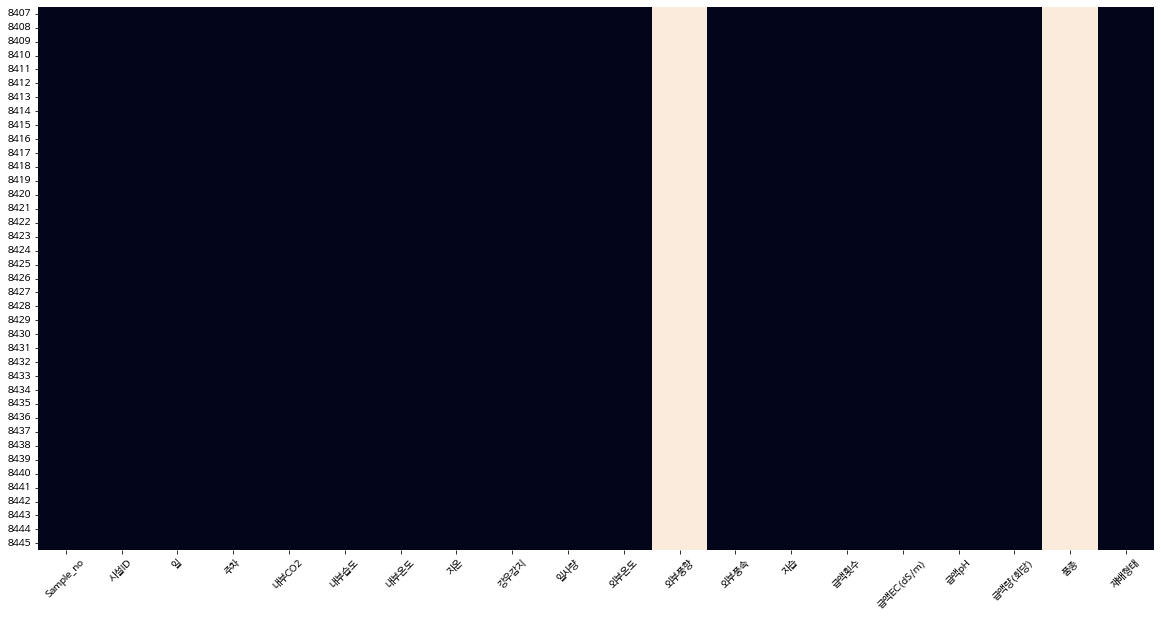

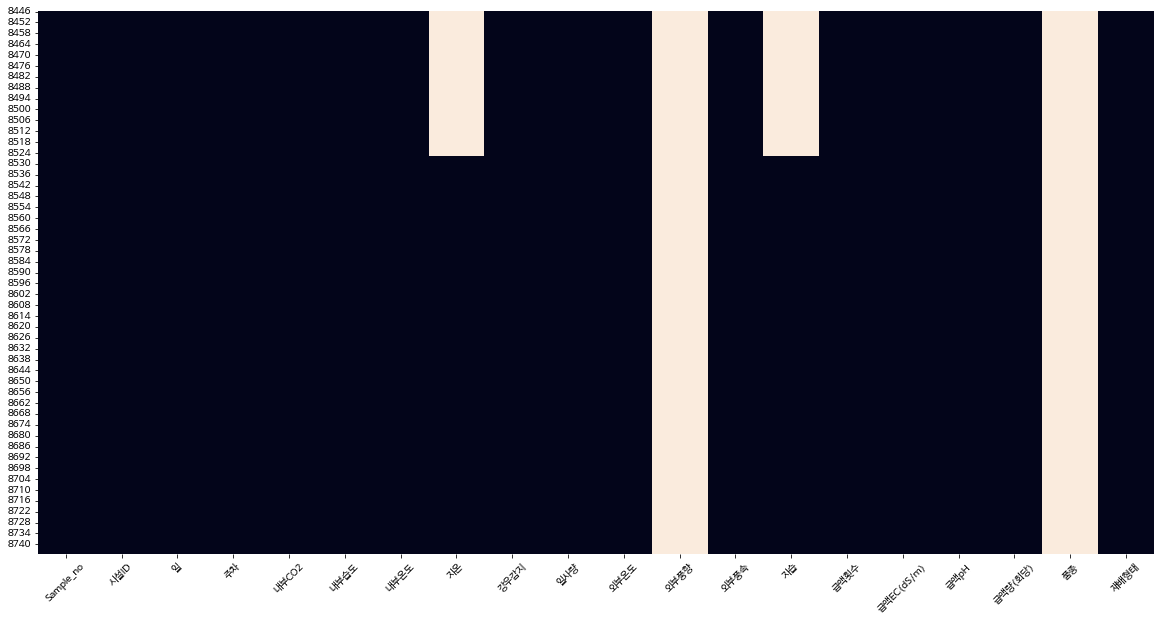

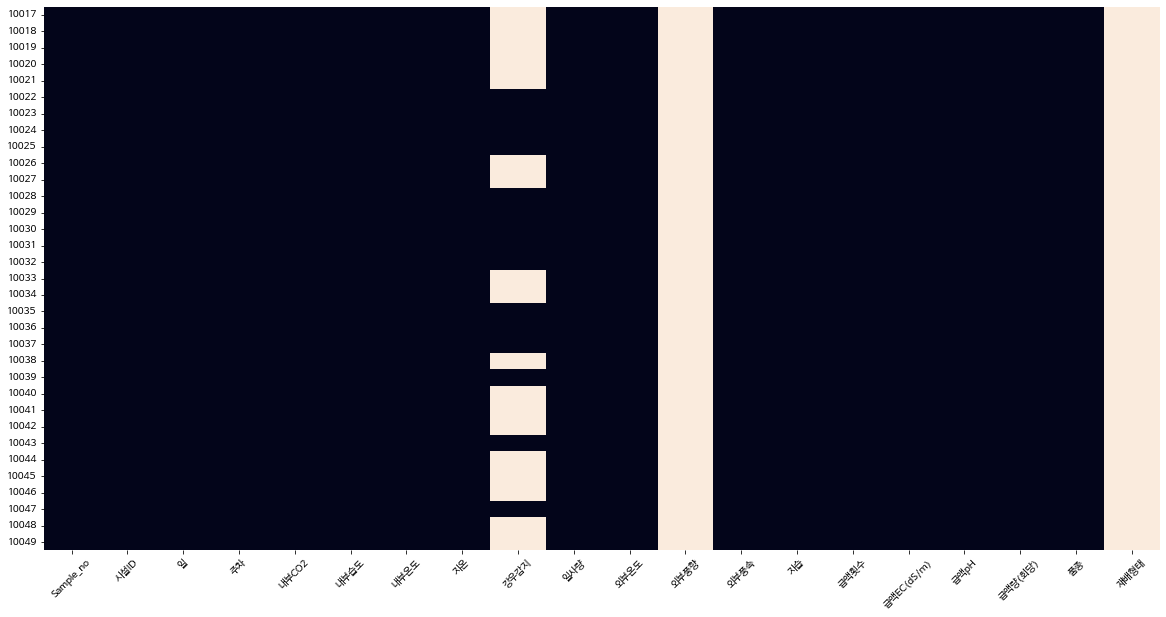

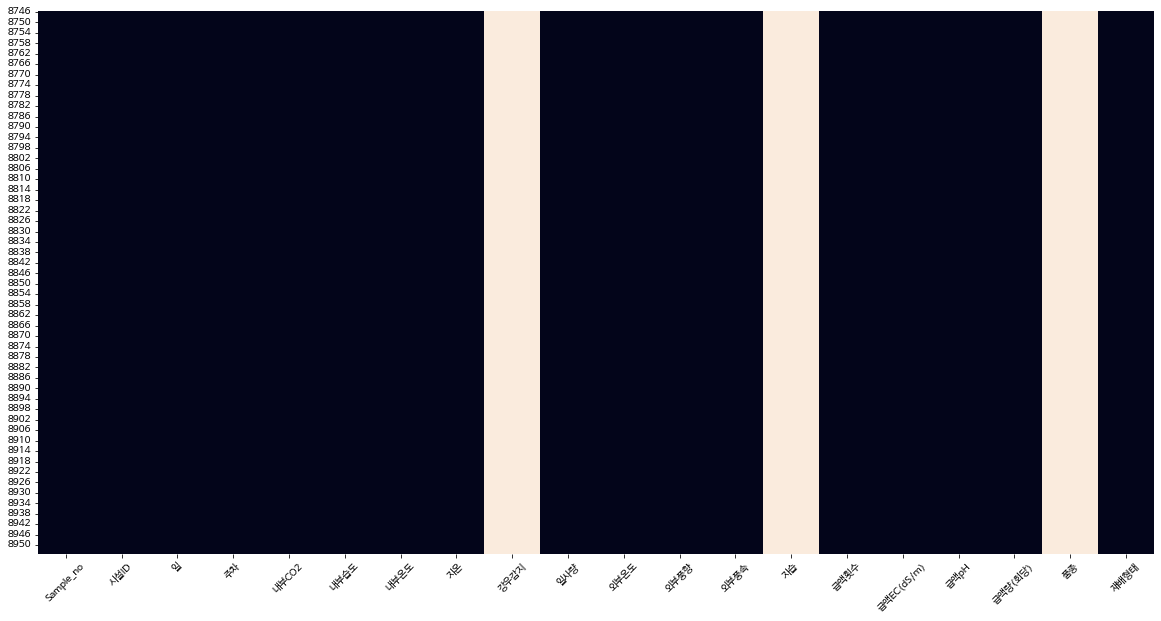

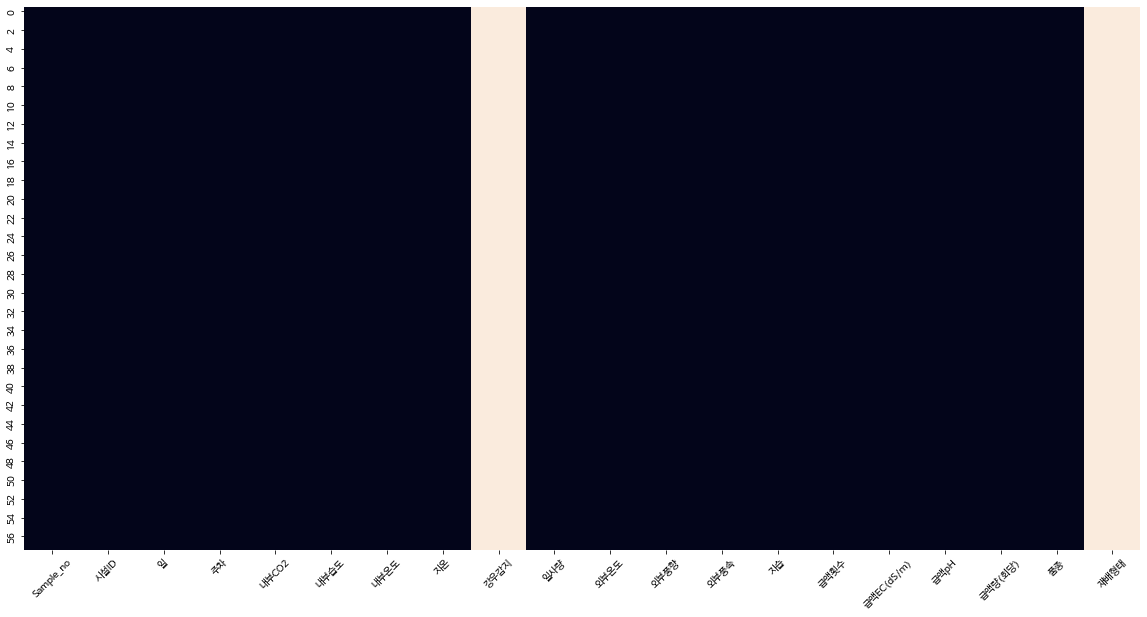

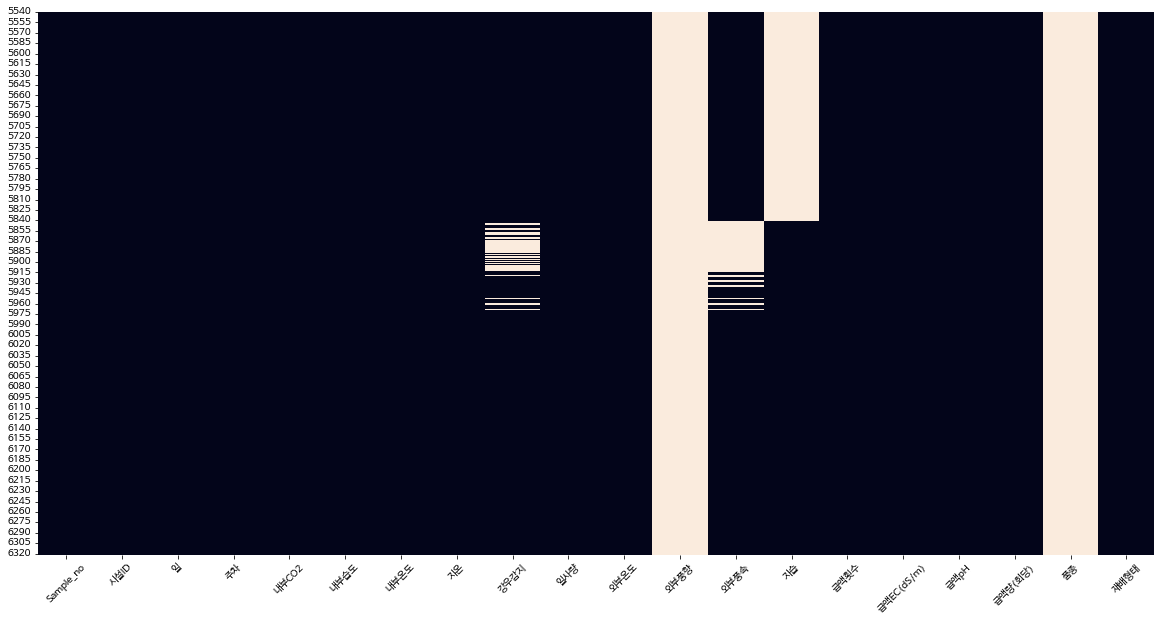

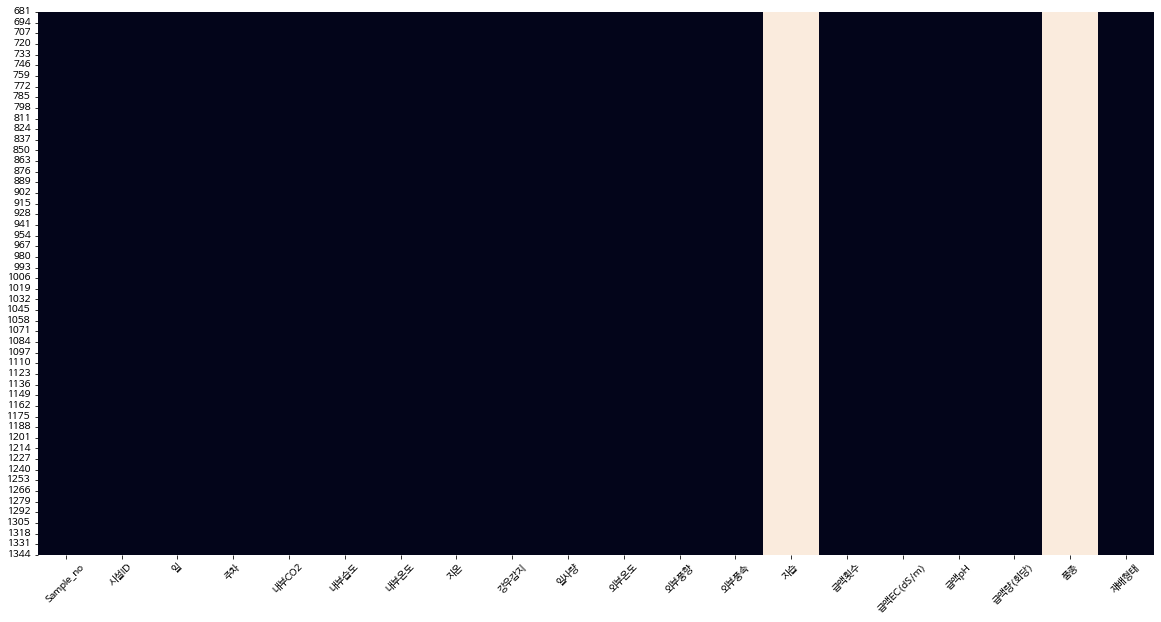

In [20]:
for farm in farms:
    per_farm[farm] = inputs[inputs['시설ID']==farm]
    check_null(per_farm[farm])


무엇을 보완해야할까.
일단 `null` 값을 전부 0으로 바꾸고 마스킹을 해봐야겠다.

<AxesSubplot:>

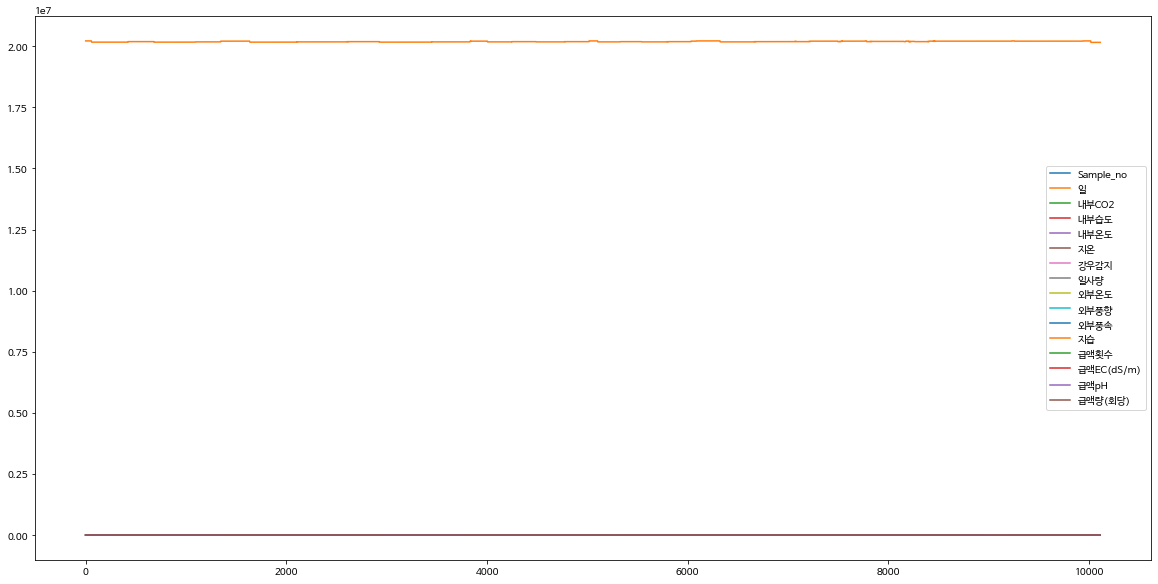

In [8]:

inputs.plot(figsize=(20,10))

In [21]:
per_farm

{'farm10':       Sample_no    시설ID         일    주차       내부CO2       내부습도       내부온도  지온  \
 7084       1408  farm10  20191125  10주차  751.385000  78.813750  15.742083 NaN   
 7085       1408  farm10  20191126  10주차  745.426667  75.044167  13.600000 NaN   
 7086       1408  farm10  20191127  10주차  739.076667  79.712917  15.795000 NaN   
 7087       1408  farm10  20191128  10주차  746.147083  77.454583  14.806250 NaN   
 7088       1408  farm10  20191129  10주차  658.835833  82.426250  13.751250 NaN   
 ...         ...     ...       ...   ...         ...        ...        ...  ..   
 7491       1482  farm10  20210422  31주차  643.771629  67.816840  19.759831 NaN   
 7492       1482  farm10  20210423  31주차  614.740097  47.777403  21.533750 NaN   
 7493       1482  farm10  20210424  31주차  616.301637  70.508776  14.775214 NaN   
 7494       1482  farm10  20210425  31주차  584.201147  65.740139  15.926828 NaN   
 7495       1482  farm10  20210426  31주차  625.878472  64.788866  18.073076 NaN   
 
    

In [23]:
per_farm.keys()

dict_keys(['farm10', 'farm01', 'farm18', 'farm29', 'farm14', 'farm03', 'farm13', 'farm15', 'farm19', 'farm09', 'farm24', 'farm35', 'farm28', 'farm04', 'farm08', 'farm22', 'farm02', 'farm11', 'farm27', 'farm30', 'farm16', 'farm36', 'farm33', 'farm17', 'farm32', 'farm06', 'farm07', 'farm31', 'farm12', 'farm20', 'farm23', 'farm21', 'farm26', 'farm25', 'farm05', 'farm34'])

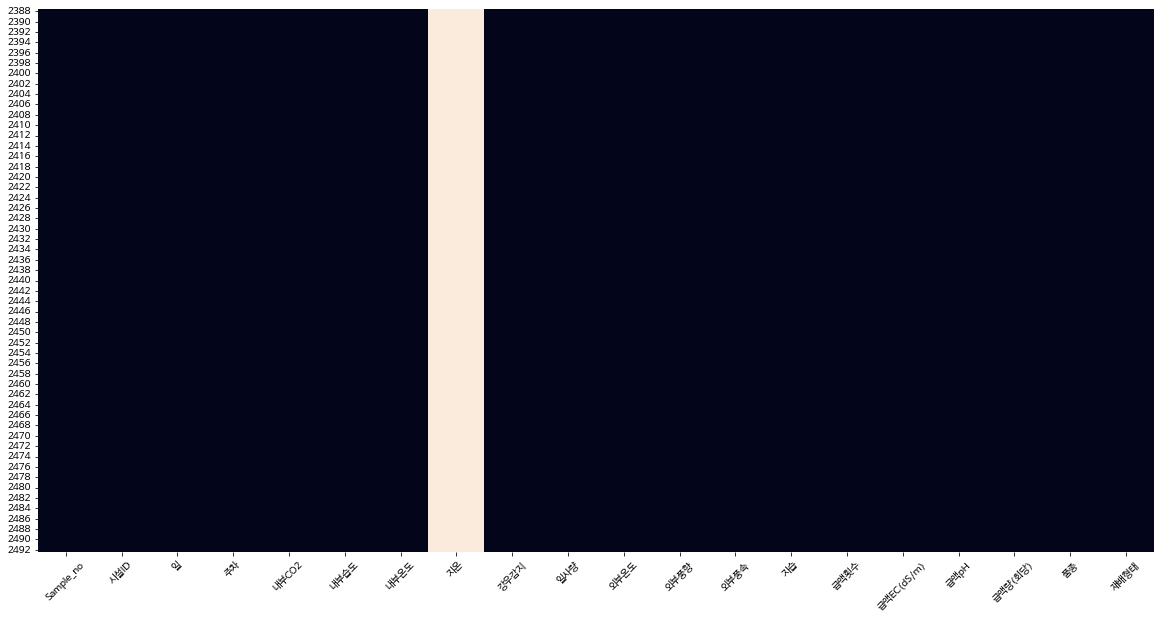

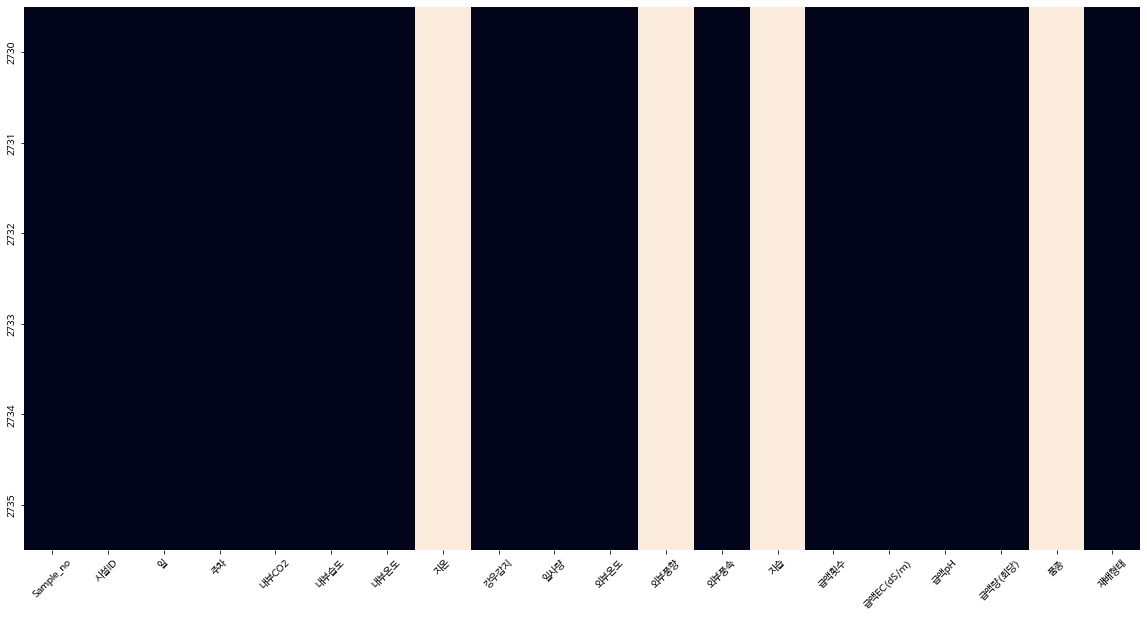

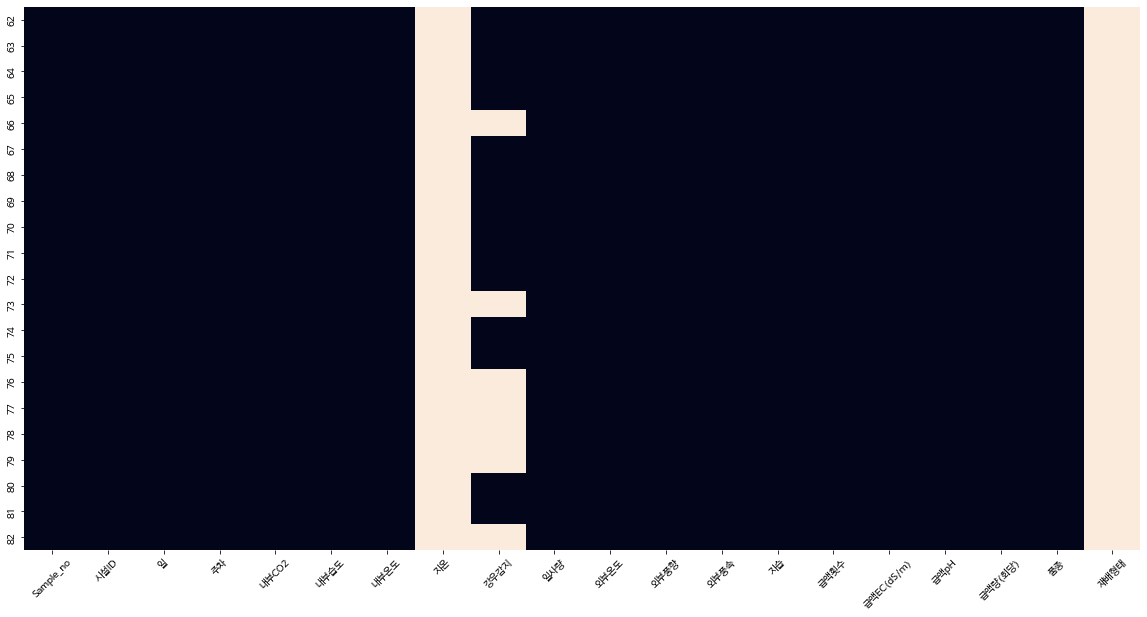

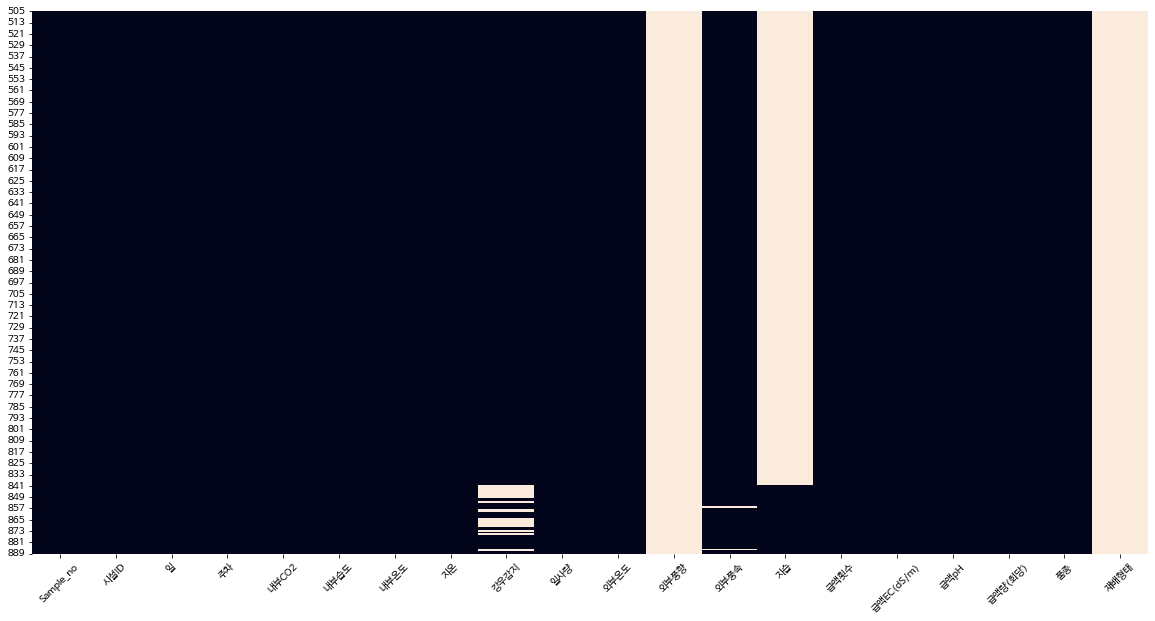

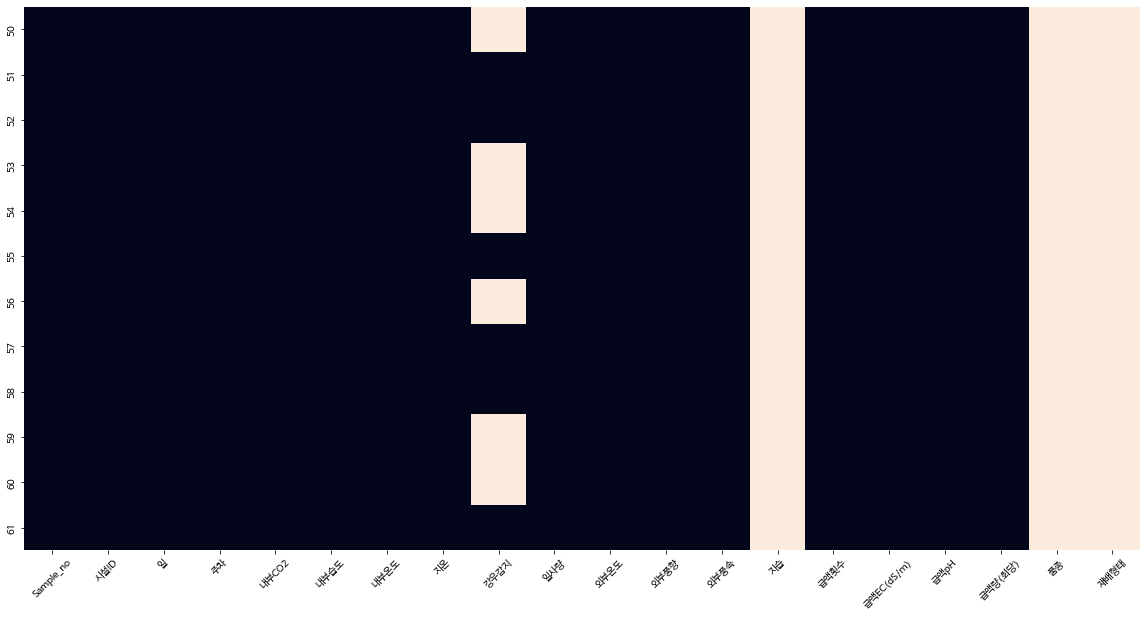

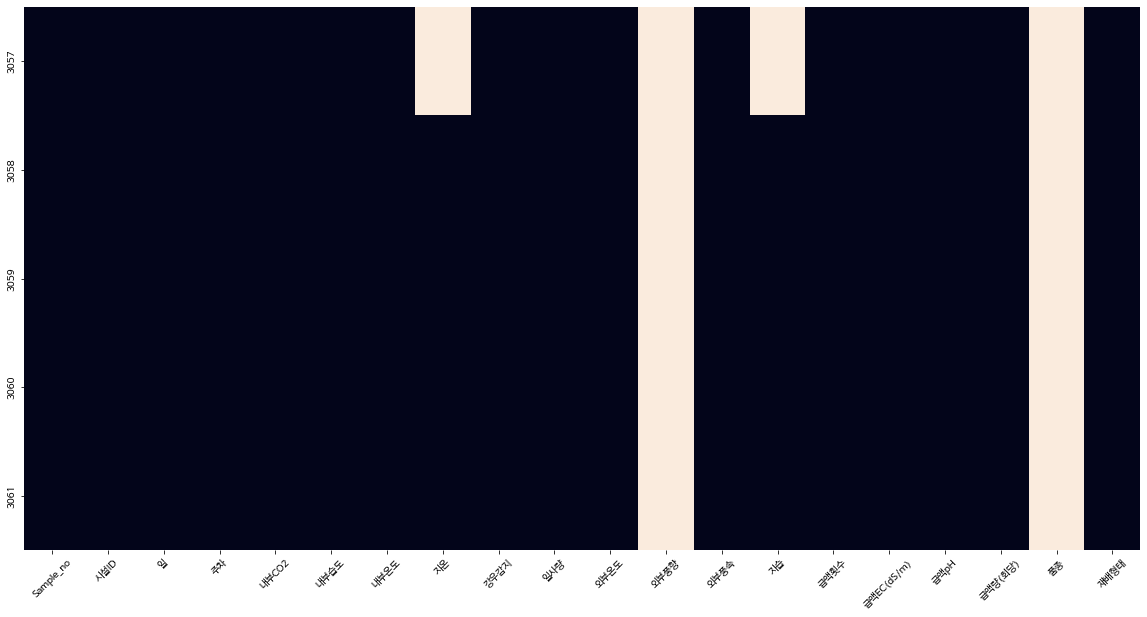

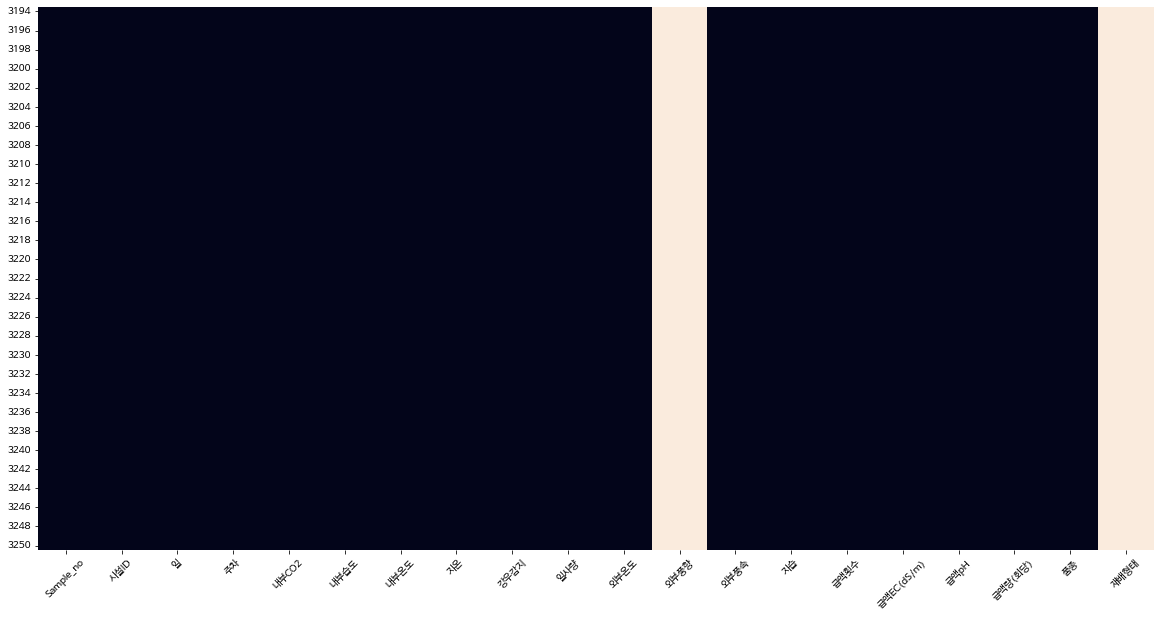

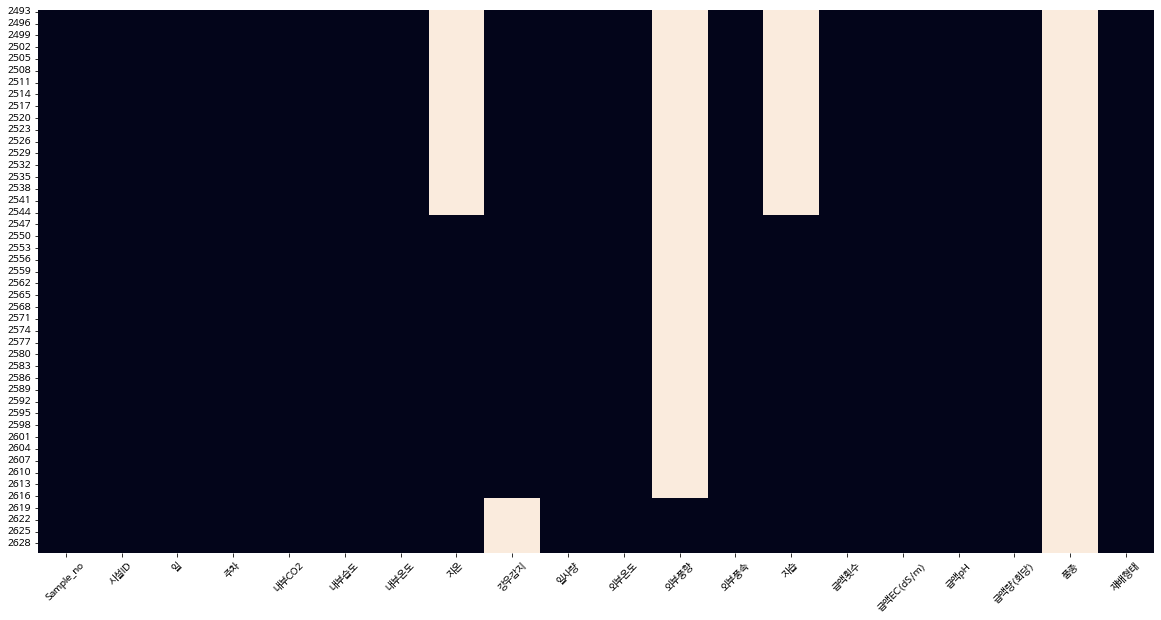

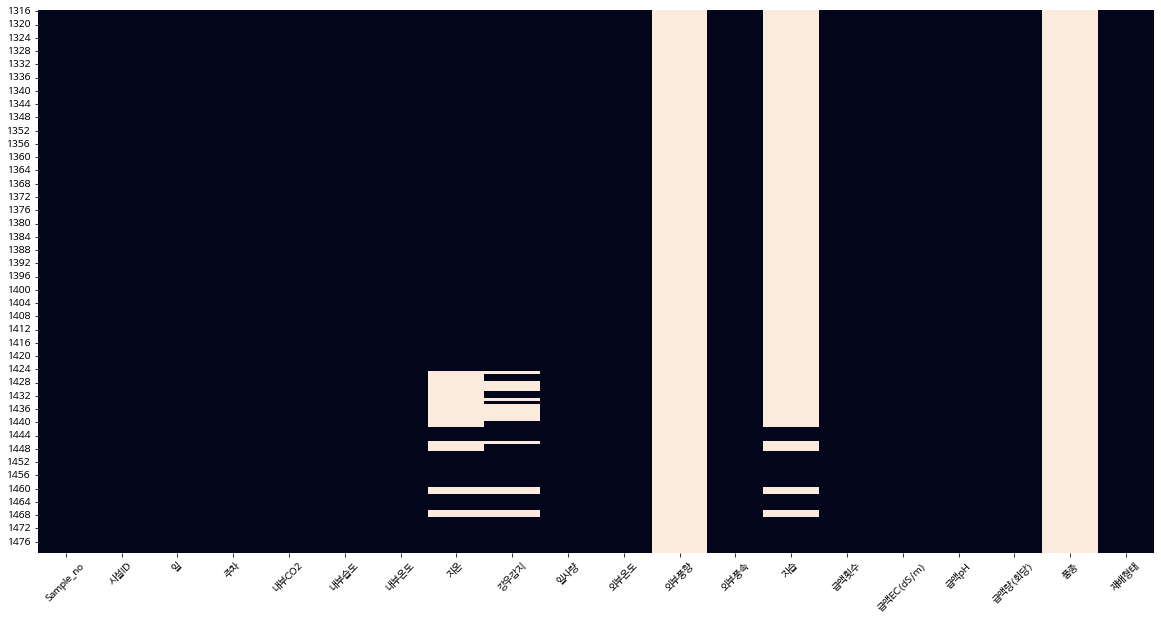

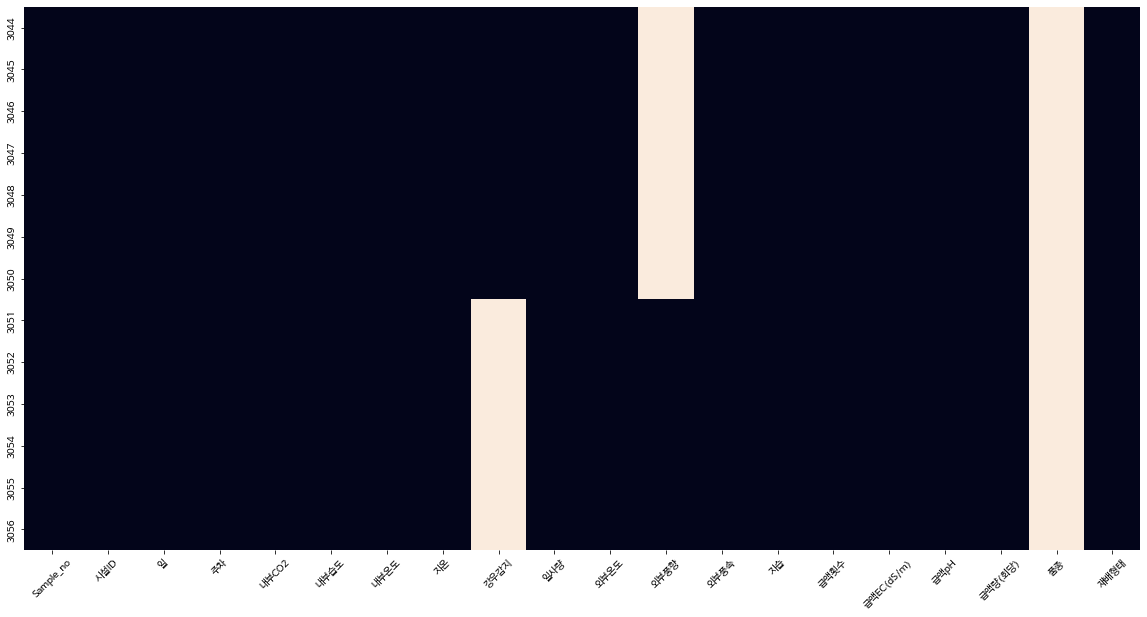

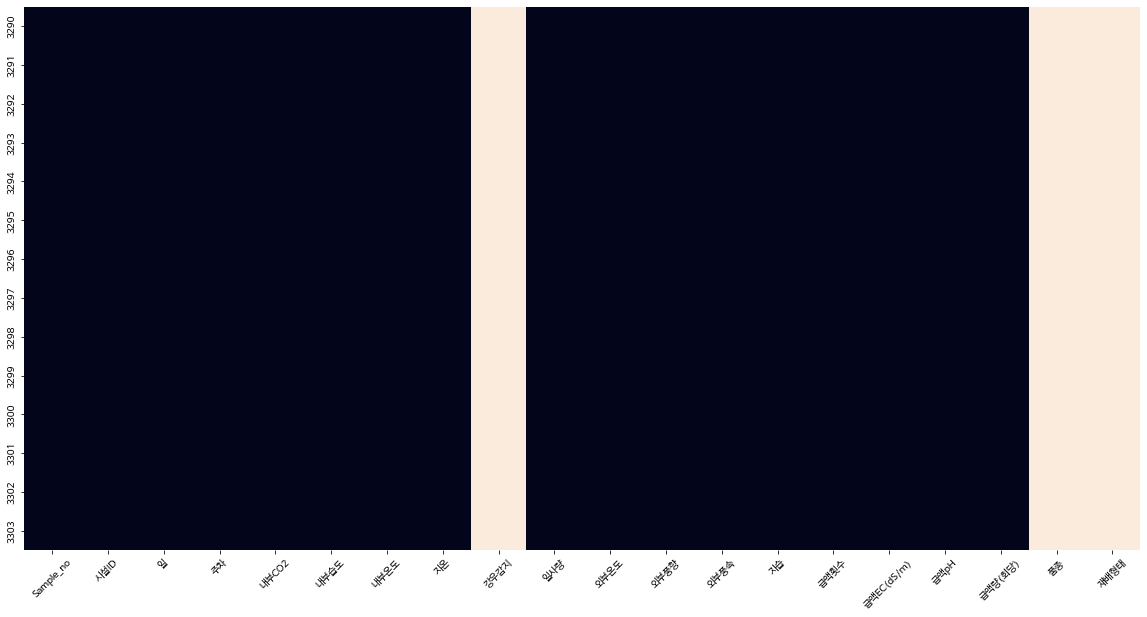

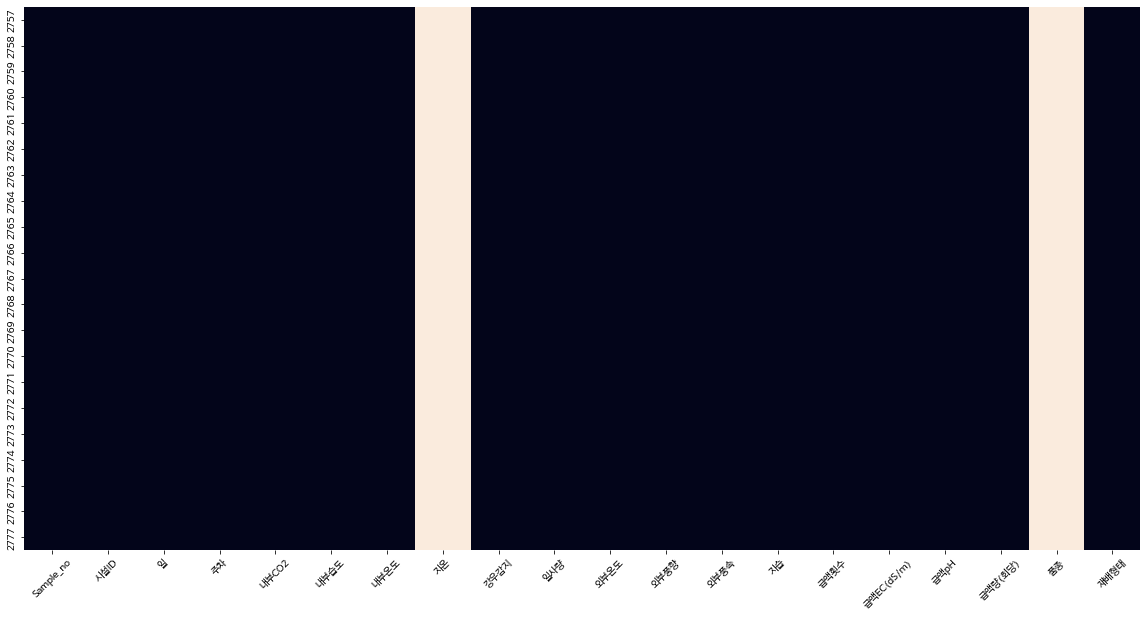

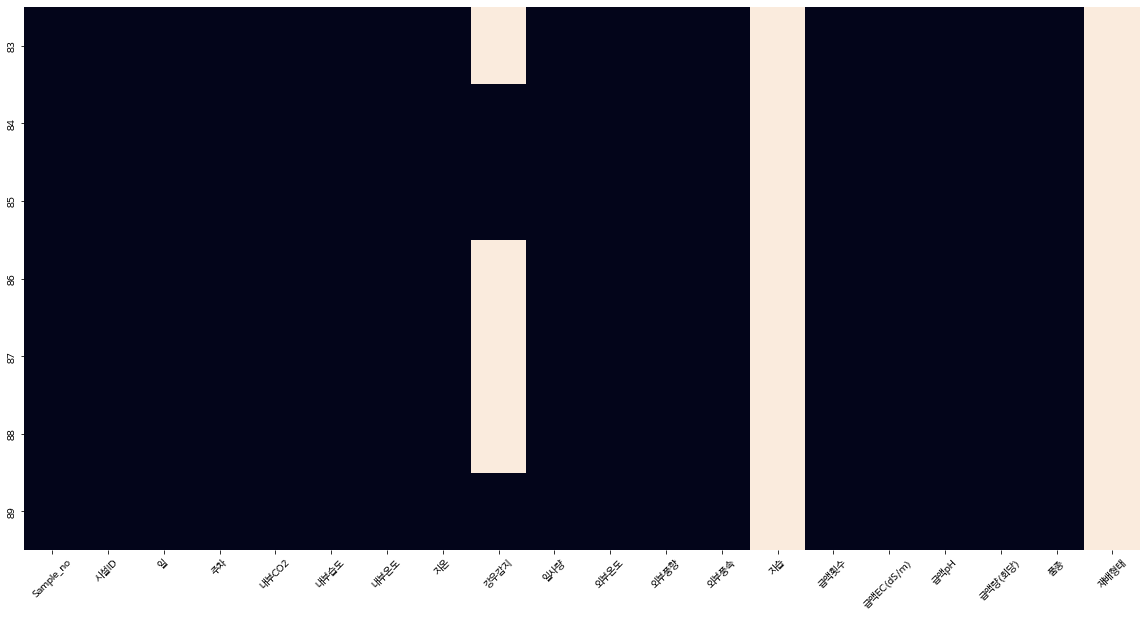

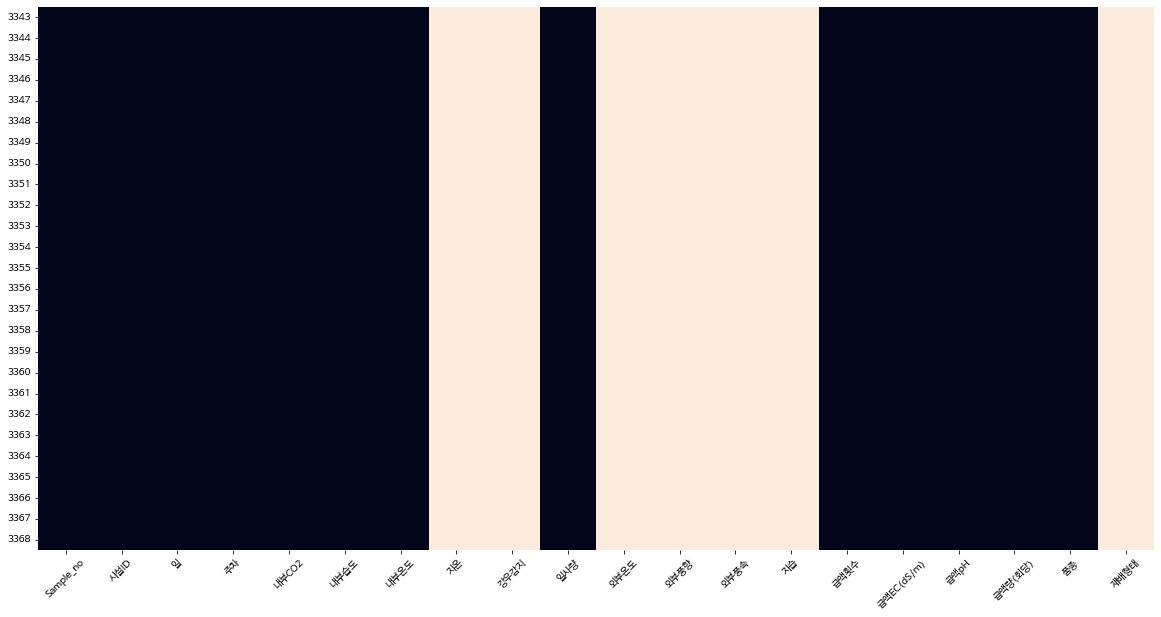

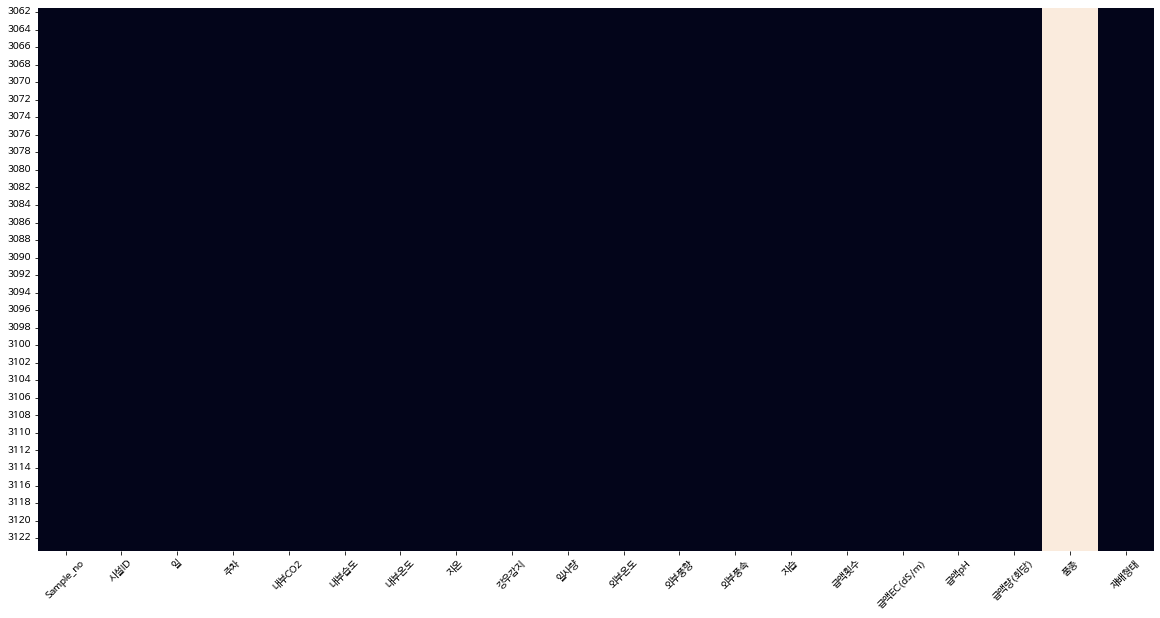

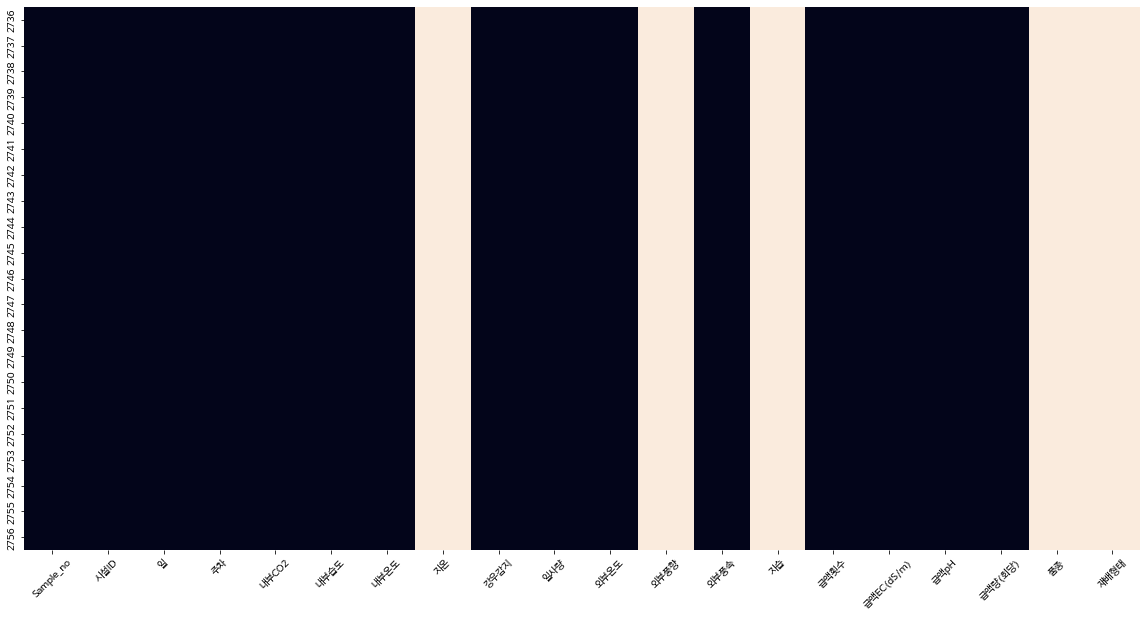

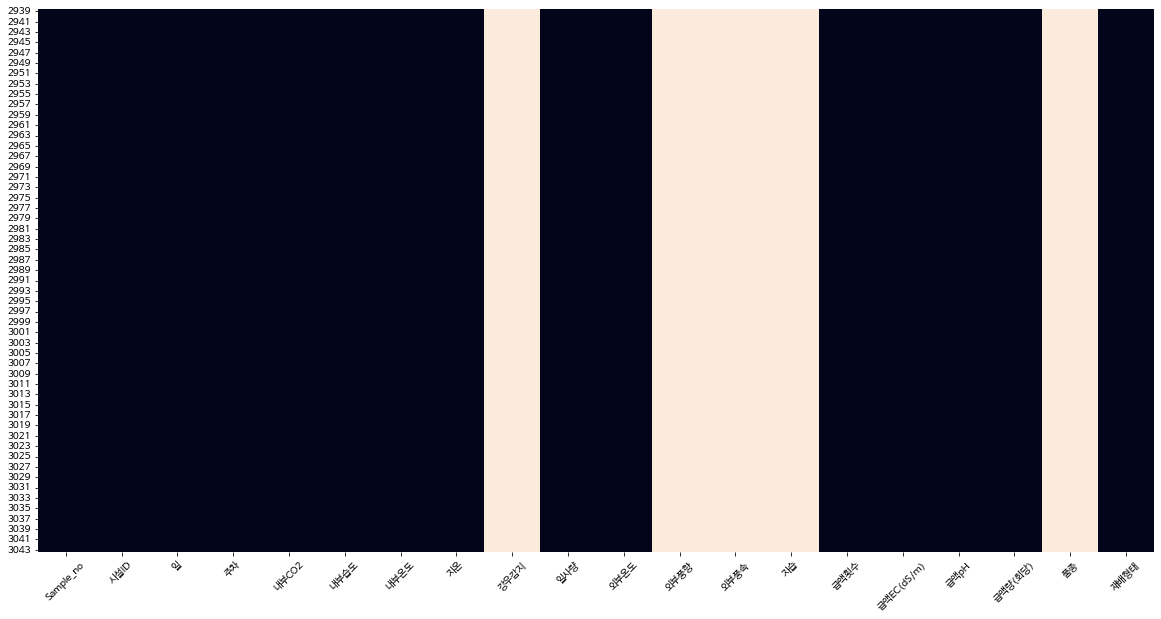

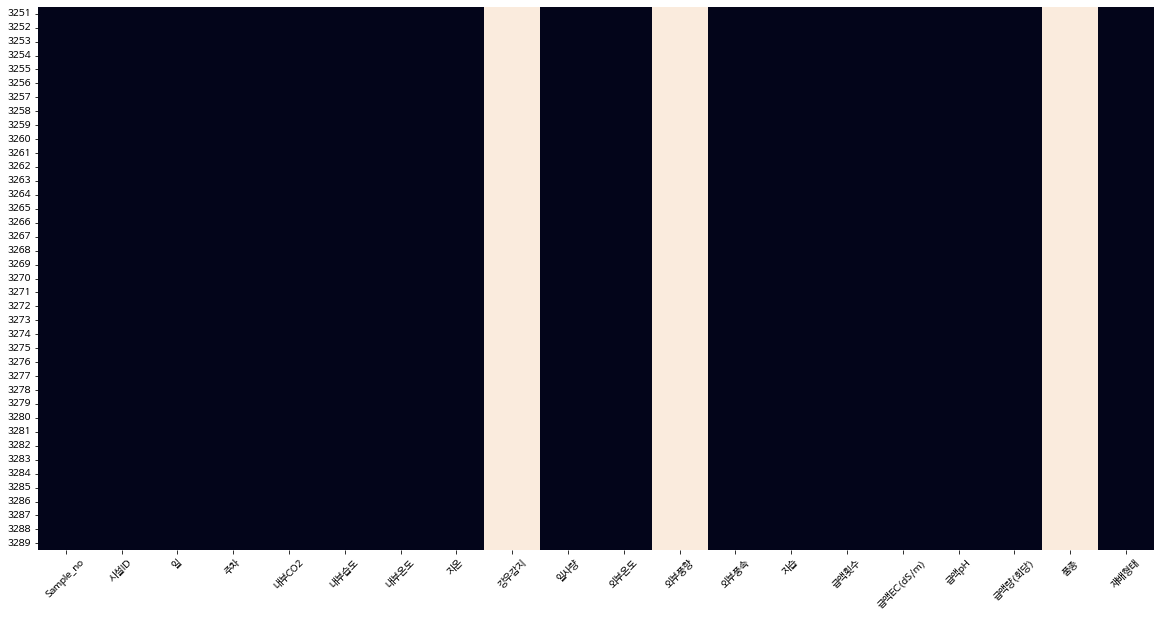

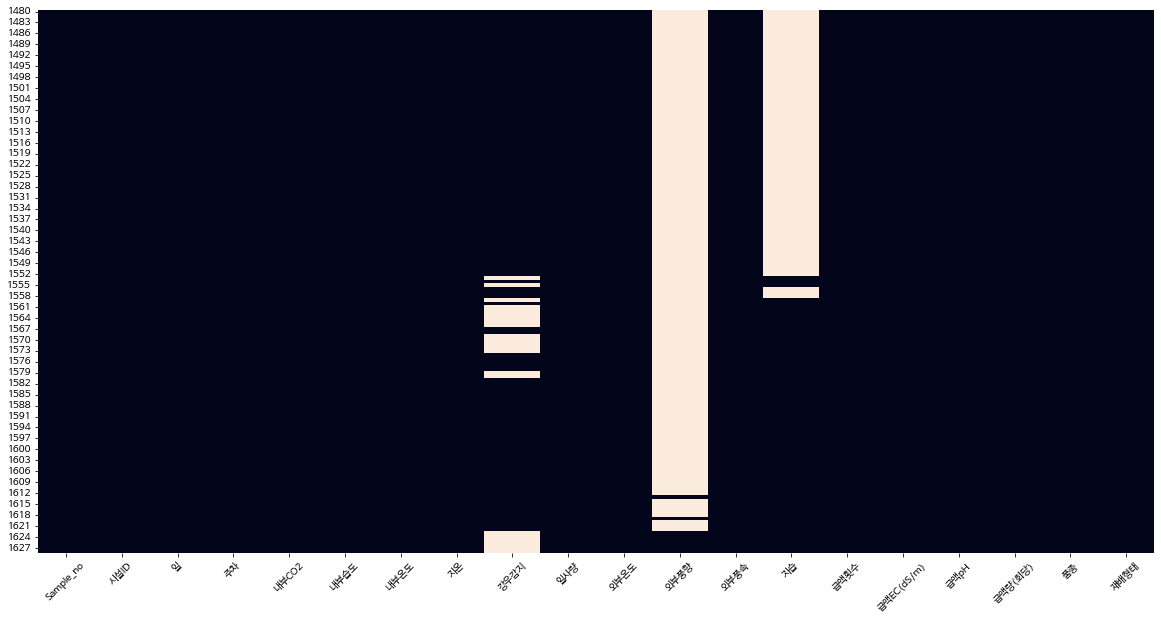

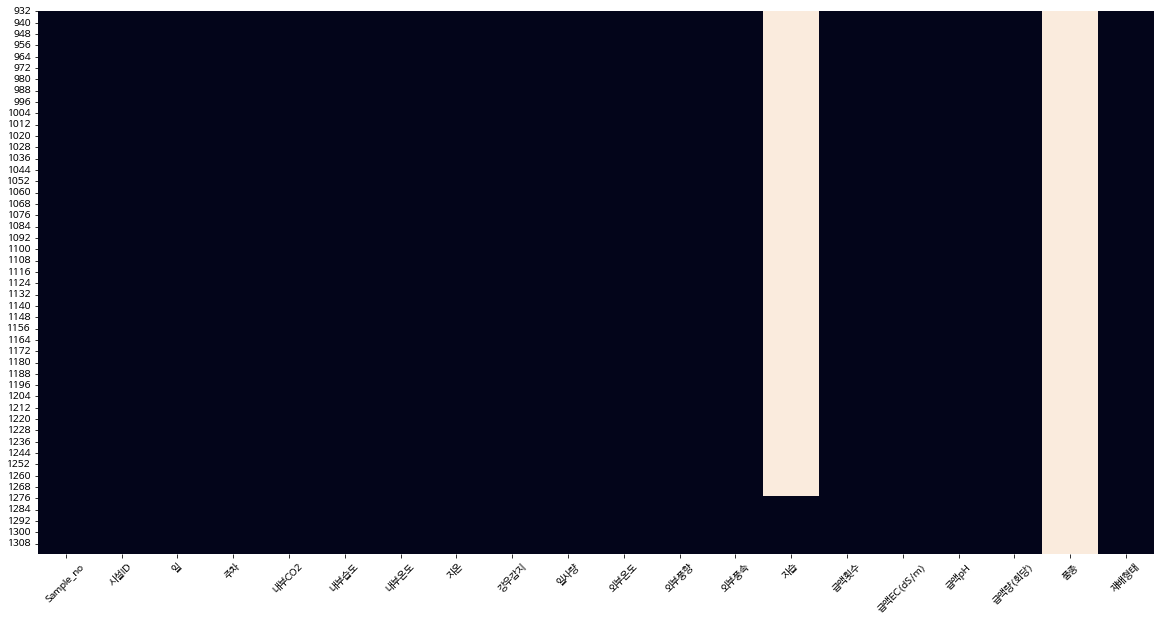

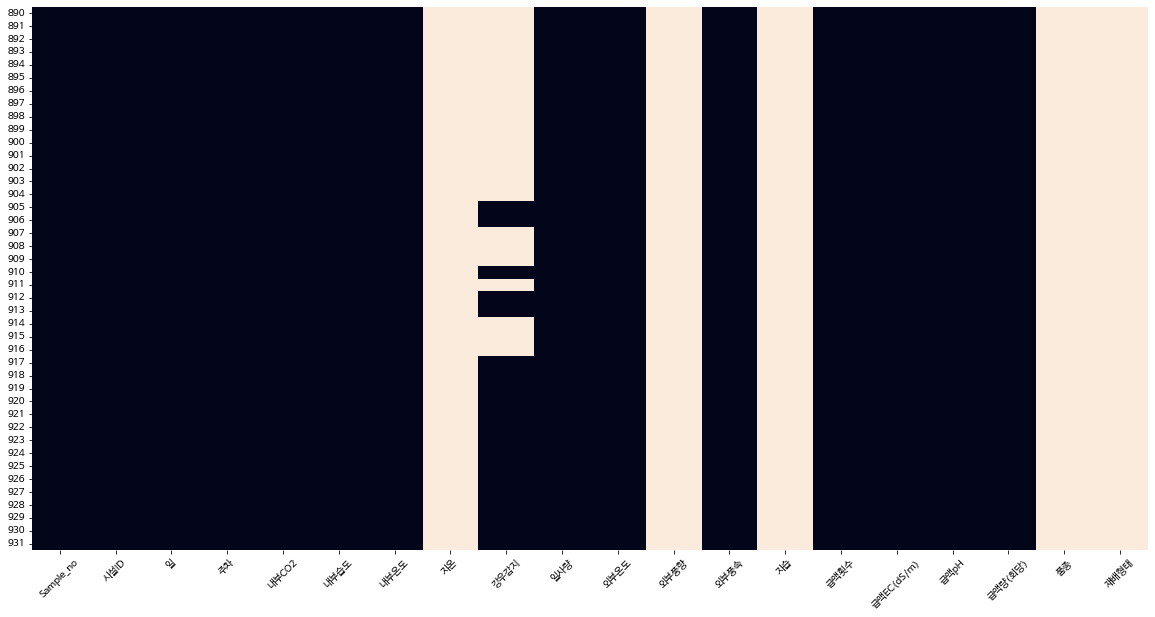

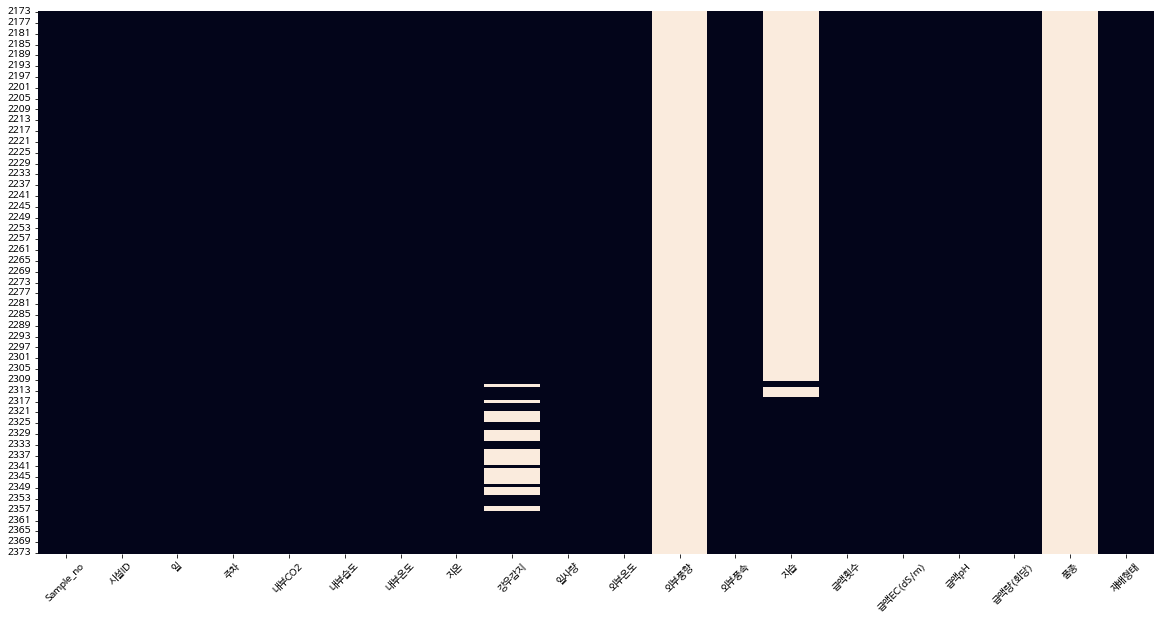

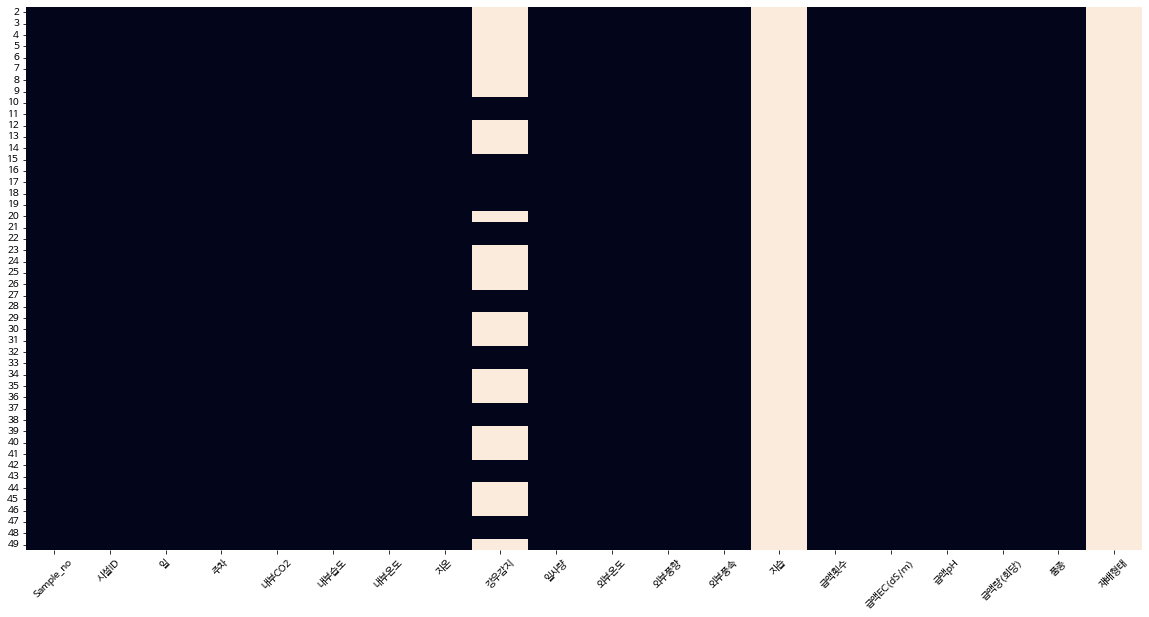

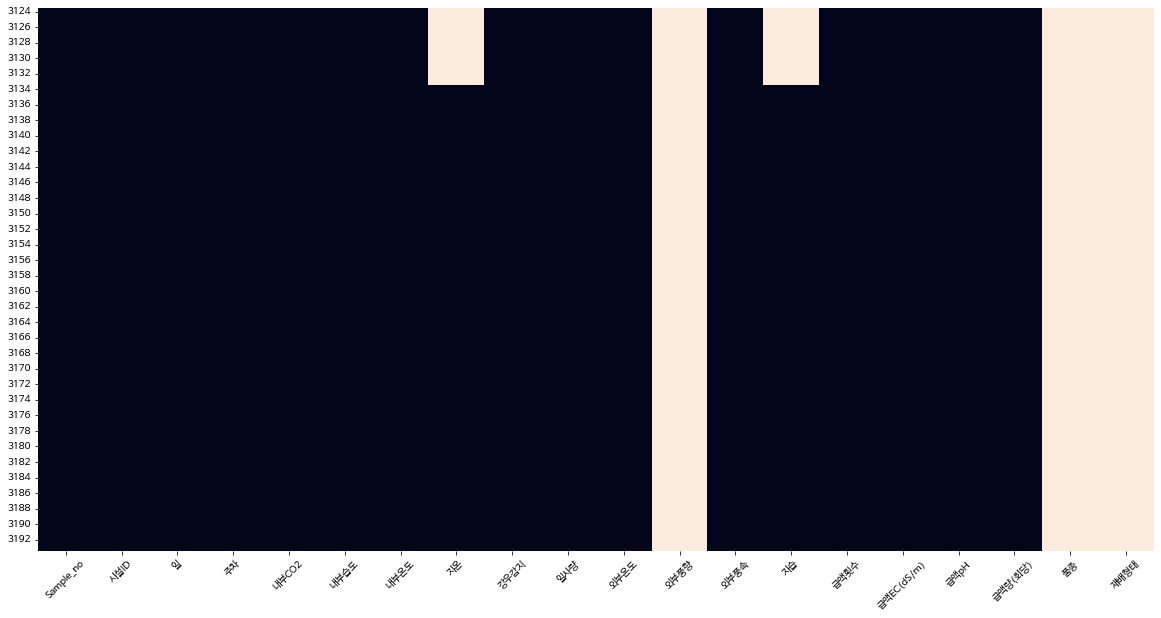

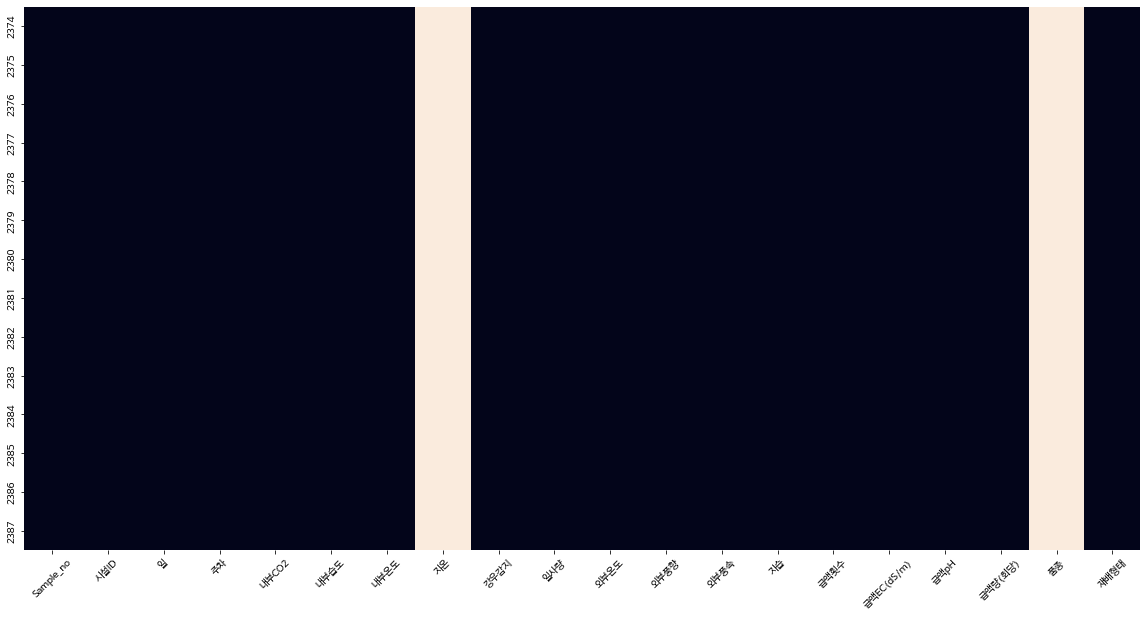

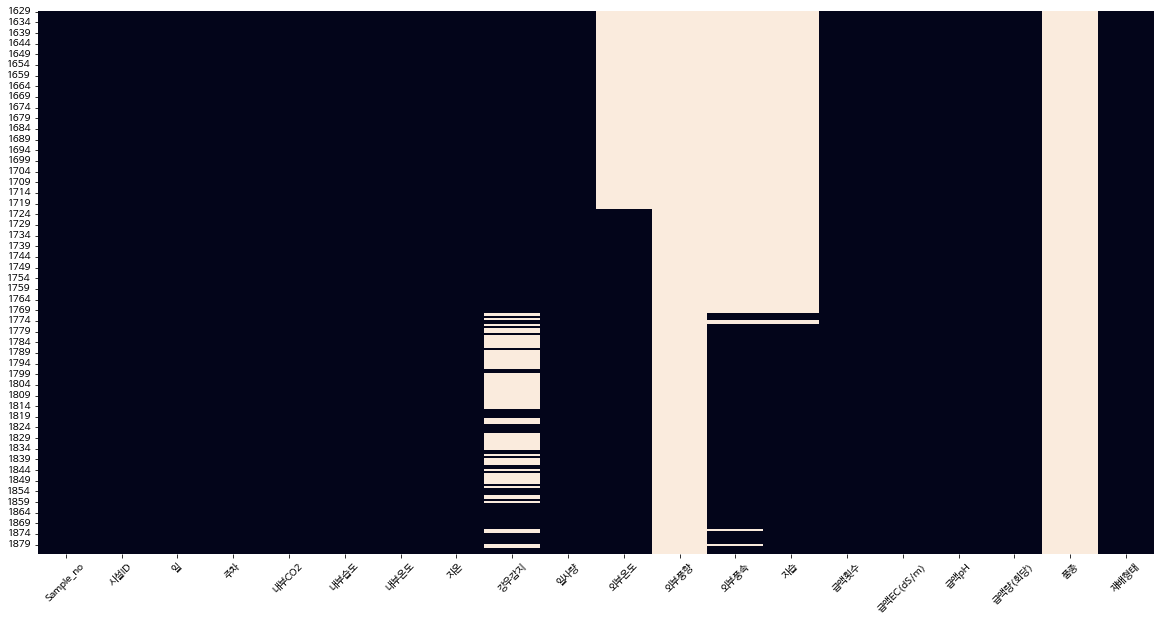

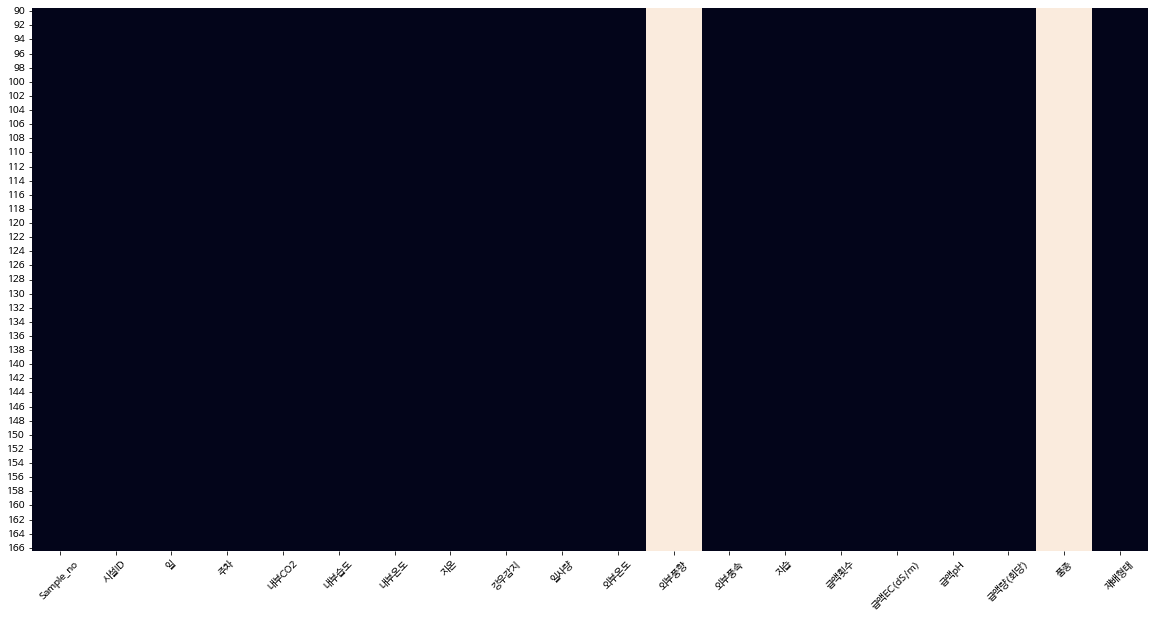

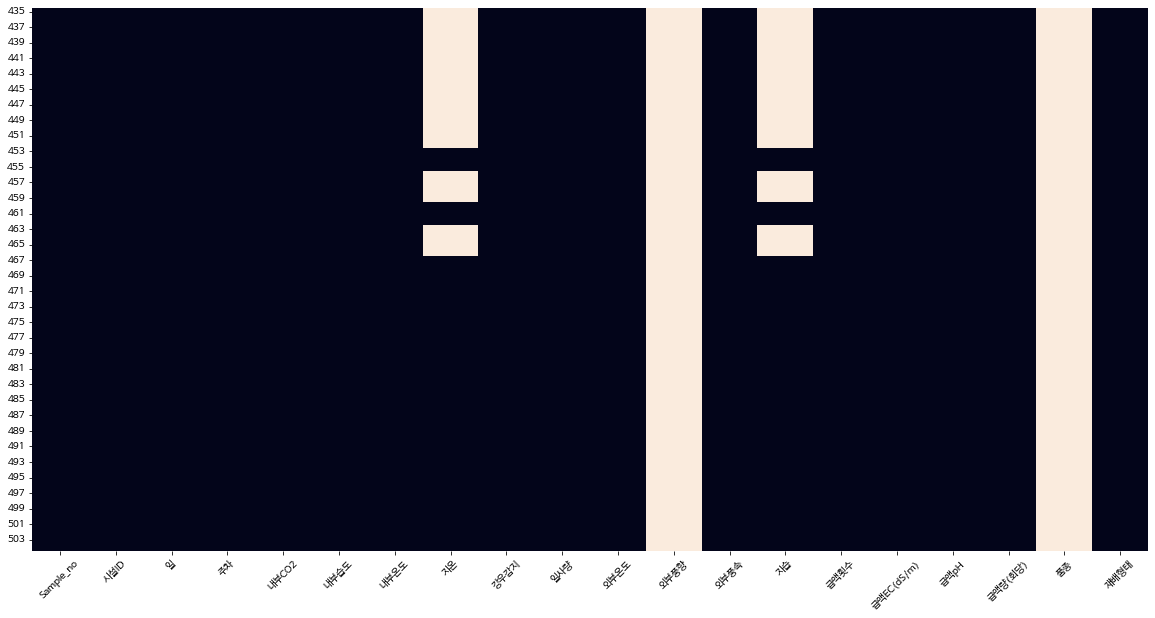

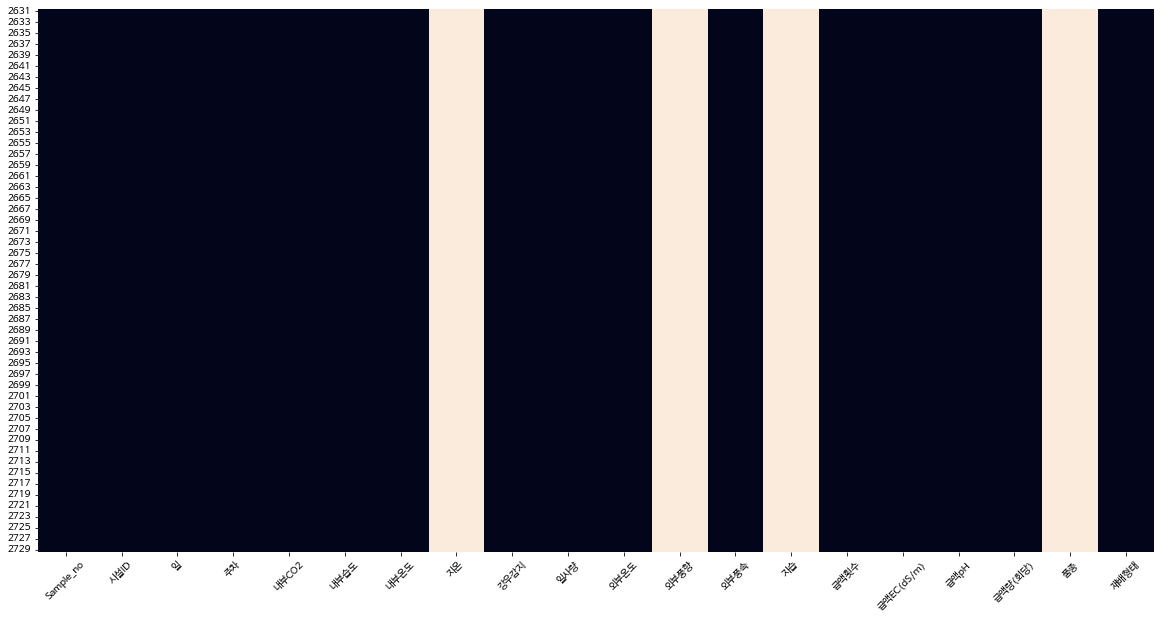

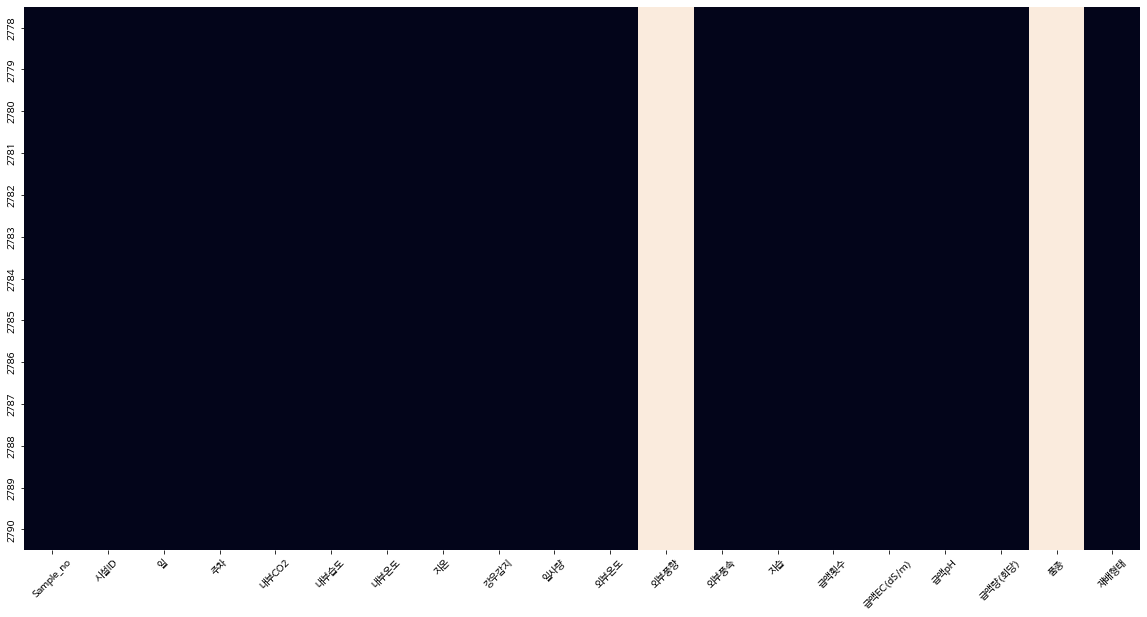

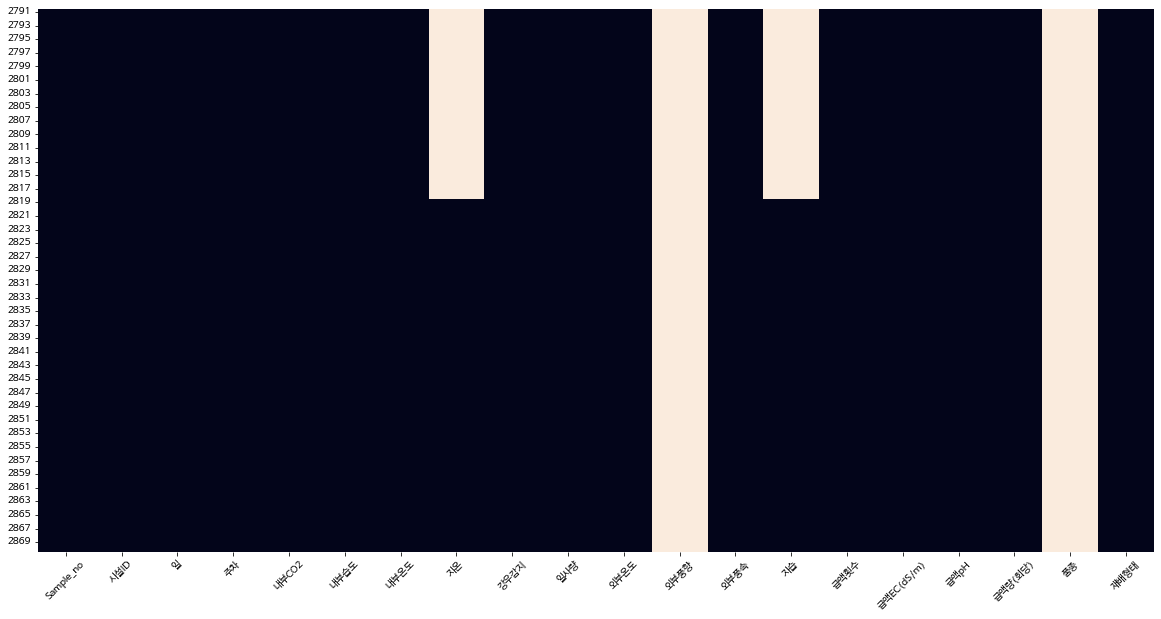

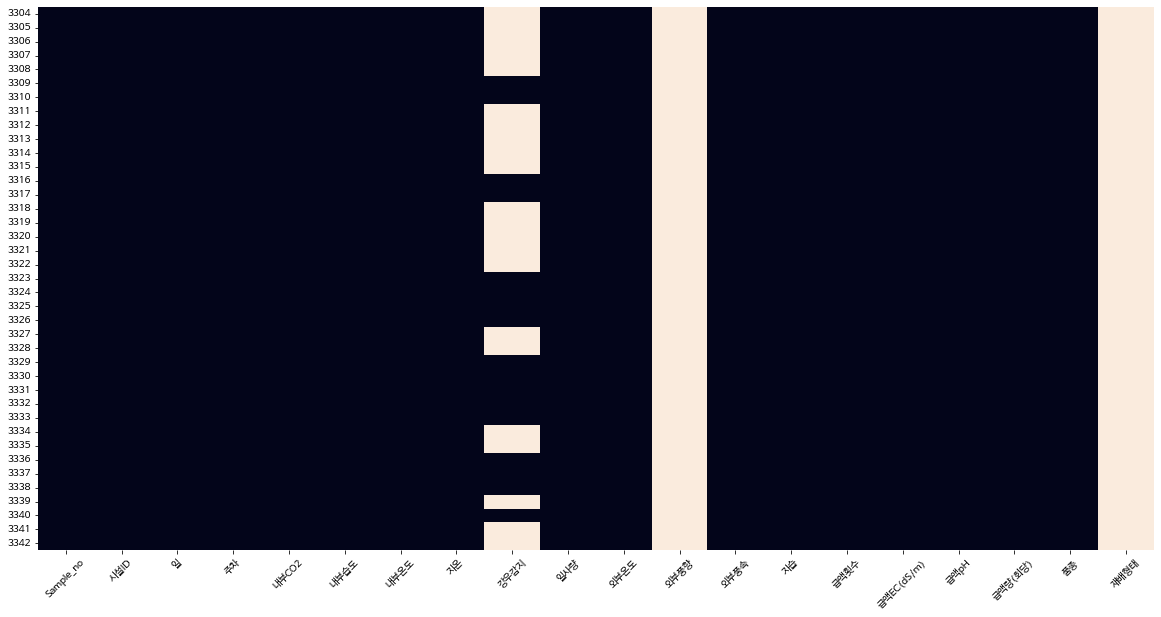

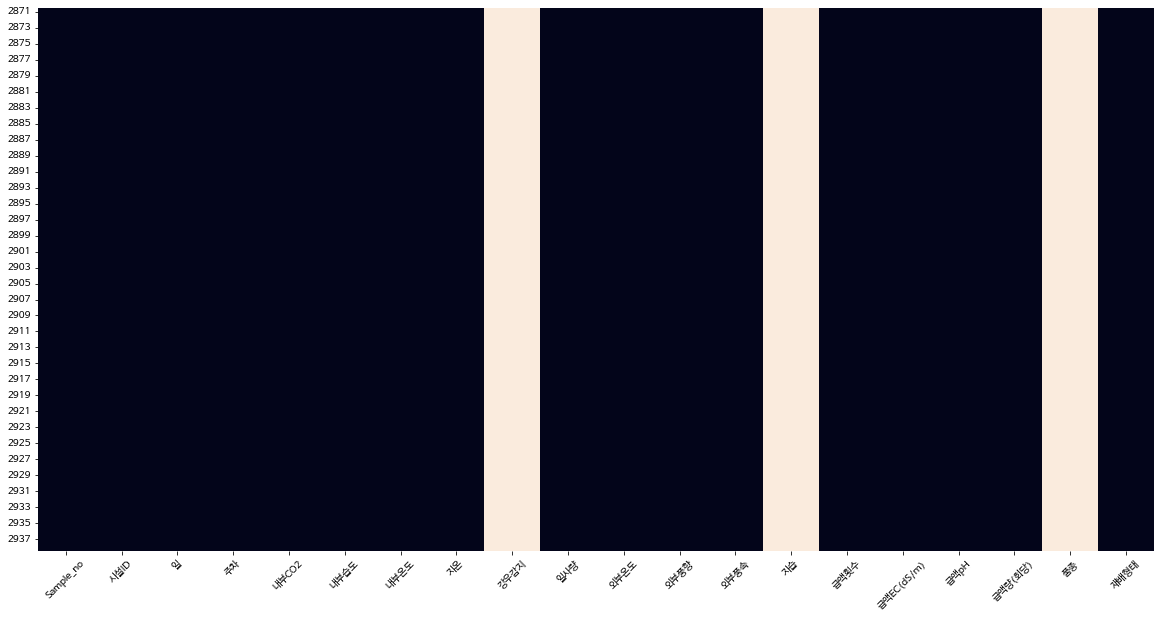

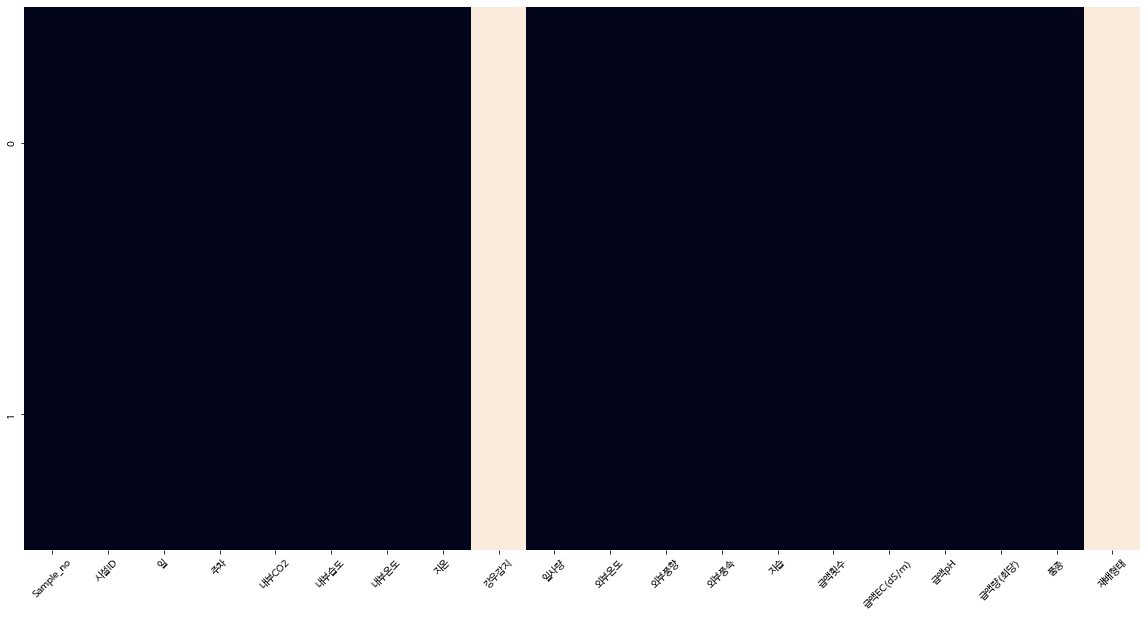

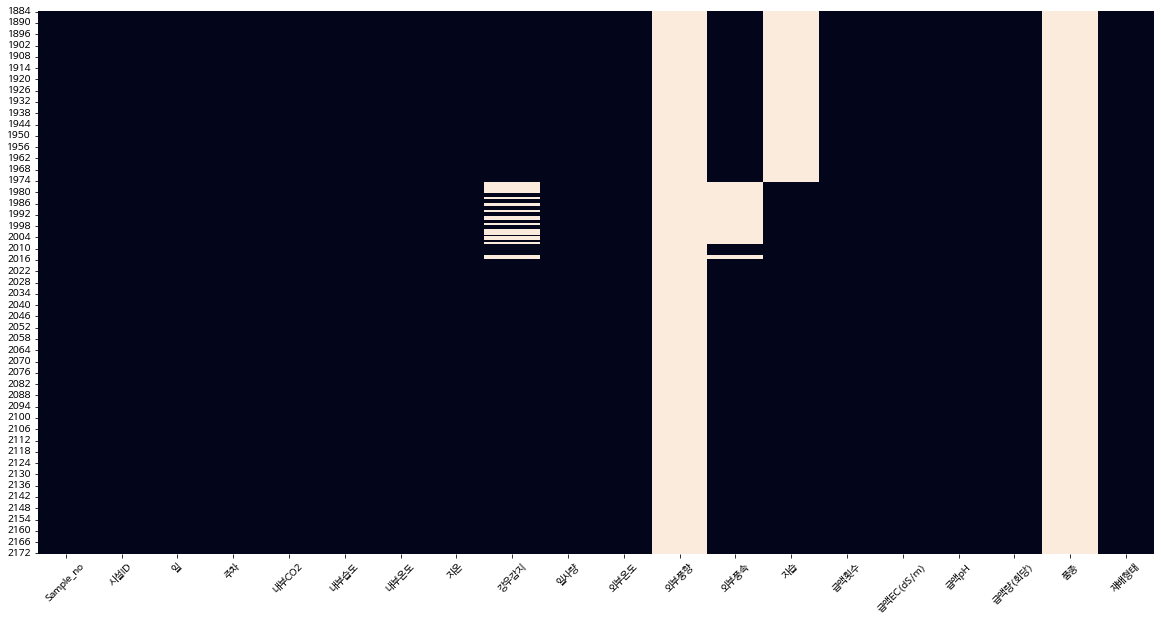

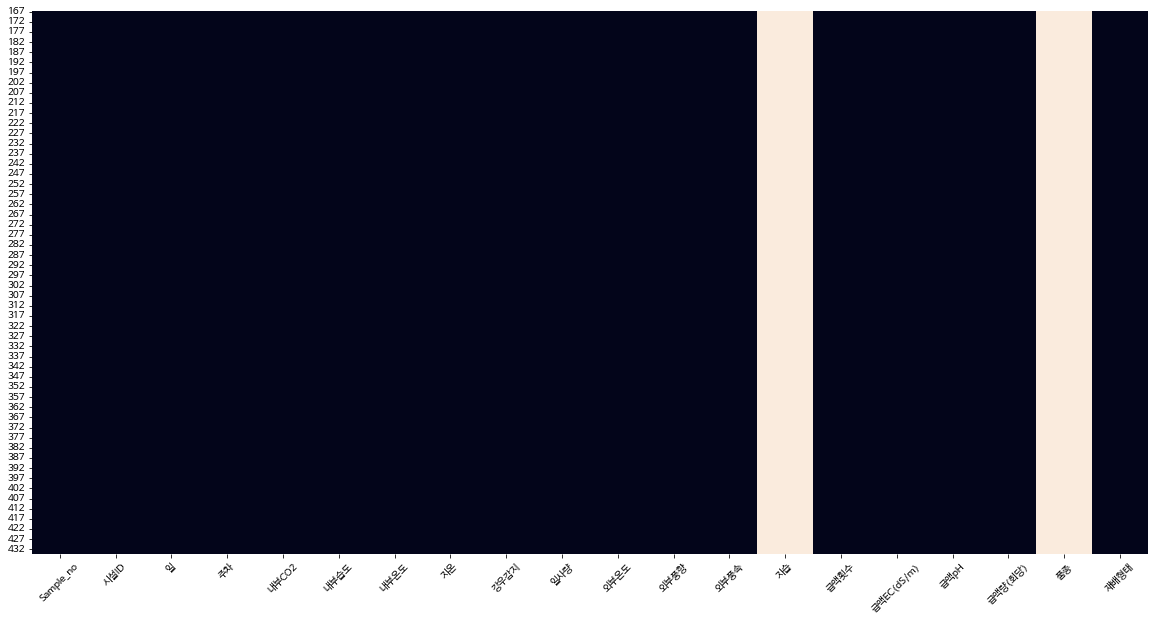

In [25]:
farms = set(test_inputs['시설ID'])
test_per_farm = {}
for farm in farms:
    test_per_farm[farm] = test_inputs[test_inputs['시설ID']==farm]
    check_null(test_per_farm[farm])

In [5]:
import torch as th


/home/hchang/myspace/env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import numpy as np

In [7]:
a = np.array([1,2,3,np.NaN])

In [8]:
b=  th.tensor(a)
b[3]

tensor(nan, dtype=torch.float64)

In [9]:
type(b[3])

torch.Tensor

<AxesSubplot:>

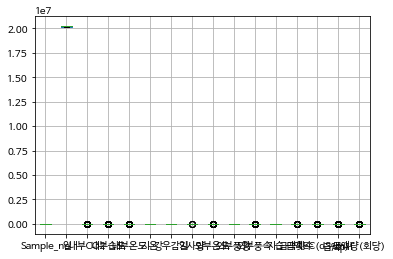

In [10]:
inputs.boxplot(figsize=(20,10))

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import argparse  as ap
import seaborn as sns


# font = fm.FontProperties(size=9)
manager = fm.FontManager()
fm.fontManager.ttflist = manager.ttflist
plt.rc('font', family='NanumBarunGothic') 
data_path = 'data/second'




# 데이터 불러오기
inputs = pd.read_csv(f'{data_path}/train_input.csv')
outputs = pd.read_csv(f'{data_path}/train_output.csv')
test_inputs = pd.read_csv(f'{data_path}/test_input.csv')
inputs
from utils import preprocess_remove_str
inputs.apply(preprocess_remove_str)

,Sample_no,시설ID,일,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,외부온도,외부풍향,외부풍속,지습,급액횟수,급액EC(dS/m),급액pH,급액량(회당),품종,재배형태
0,0,25.0,20220323,30.0,517.041667,84.985417,20.610833,0.0,NaN,1879,11.166667,195.0,0.083333,0.0,14,2.68,4.42,88,9.0,NaN
1,0,25.0,20220324,30.0,514.416667,88.291250,20.695000,0.0,NaN,1411,12.708333,142.5,0.000000,0.0,14,2.78,5.63,97,9.0,NaN
2,0,25.0,20220326,30.0,471.875000,83.514583,20.402500,0.0,NaN,1955,8.791667,202.5,0.000000,0.0,14,2.69,4.25,101,9.0,NaN
3,0,25.0,20220327,30.0,469.250000,80.916250,20.139167,0.0,NaN,2231,8.041667,180.0,0.000000,0.0,14,2.70,4.25,99,9.0,NaN
4,0,25.0,20220328,30.0,465.750000,82.026250,17.653333,0.0,NaN,2284,9.000000,97.5,0.041667,0.0,13,2.66,4.21,94,9.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,2027,4.0,20160821,7.0,334.684002,65.565417,21.985833,NaN,NaN,979,NaN,NaN,NaN,NaN,26,2.06,5.80,81,7.0,NaN
10108,2027,4.0,20160822,7.0,333.726601,61.144167,22.530833,NaN,NaN,2515,NaN,NaN,NaN,NaN,28,2.43,4.42,32,7.0,NaN
10109,2027,4.0,20160823,7.0,344.862883,72.867917,20.397917,NaN,NaN,1972,NaN,NaN,NaN,NaN,21,2.71,5.88,27,7.0,NaN
10110,2027,4.0,20160826,7.0,372.708516,66.672917,24.401667,NaN,NaN,1314,NaN,NaN,NaN,NaN,18,2.50,5.39,82,7.0,NaN


In [2]:
pd.get_dummies(inputs['시설ID'])

,farm01,farm02,farm03,farm04,farm05,farm06,farm07,farm08,farm09,farm10,...,farm27,farm28,farm29,farm30,farm31,farm32,farm33,farm34,farm35,farm36
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10108,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10109,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10110,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
preprocess_remove_str(inputs['재배형태'])

ValueError: could not convert string to float: '수경'